In [1]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
import gensim
from gensim import models

In [2]:
import numpy as np

In [3]:
import os
import json
import pandas as pd

In [44]:
!gdown 1IGZ0jRHFPB2OPFXB-1RoEhgbUZuHddBS
!gdown 143FpCQl9w2aB3EsVWxAcCuG4rF7K5F5l

zsh:1: command not found: gdown
zsh:1: command not found: gdown


In [45]:
!unzip /content/non_rumor.zip
!unzip /content/rumor.zip

unzip:  cannot find or open /content/non_rumor.zip, /content/non_rumor.zip.zip or /content/non_rumor.zip.ZIP.
unzip:  cannot find or open /content/rumor.zip, /content/rumor.zip.zip or /content/rumor.zip.ZIP.


In [4]:
rumor_path=os.getcwd()+'/rumor'
non_rumor_path=os.getcwd()+'/non_rumor'

In [5]:
rumorList = list()
for (dirpath, dirnames, filenames) in os.walk(rumor_path):
    rumorList += [os.path.join(dirpath, file) for file in filenames if file.endswith('.json')]
len(rumorList)

555

In [6]:
non_rumorList = list()
for (dirpath, dirnames, filenames) in os.walk(non_rumor_path):
    non_rumorList += [os.path.join(dirpath, file) for file in filenames if file.endswith('.json')]
len(non_rumorList)

1519

In [7]:
from bangla_stemmer.stemmer import stemmer
def stemmerbangla(data):
  wordlist = data.split(" ")
  stmr = stemmer.BanglaStemmer()
  stm = stmr.stem(wordlist)
  return " ".join(stm)

In [8]:
import re
def onlybangla(data):
  bangla=data.replace('\r', ' ').replace('\n', ' ')
  bangla = "".join(i for i in bangla if i in [" "] or 2432 <= ord(i) <= 2559 or ord(i)== 32)
  return " ".join(bangla.split())

In [9]:
a_file = open(os.getcwd()+"/stopwords-bn.txt", "r")

bn_stopwords = []
for line in a_file:
  stripped_line = line.strip()
  bn_stopwords.append(stripped_line)

a_file.close()
def remove_stop_word(text):
  words = [word for word in text.split(" ") if word not in bn_stopwords]
  new_text = " ".join(words)
  return new_text

In [10]:
def remove_punctuations(my_str):
    # define punctuation
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰🤣⚽️✌�￰৷￰'''
    
    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return " ".join(no_punct.split())

In [11]:
def rawtodf(listdata):
    listofdata=[]
    commentscount=0
    for datas in listdata:
        with open(datas, encoding='utf-8') as fh:
            data = json.load(fh)
            if data['text']!="" and len(data['comments'])!=0:
                no_duplication=list(dict.fromkeys(data['comments']))
                commentscount+=len(no_duplication)
                listofdata.append([data['text']," ".join(no_duplication),data['label']])
    return pd.DataFrame(listofdata, columns = ["text","comments","label"]),commentscount
      
    #listofRumorandNonrumor.append([data['text'],data['sharecount'],(lambda: 1, lambda: 0)[data['post_shared_link']==""](),data['reactions']['likes']/data['reactioncount'],data['reactions']['loves']/data['reactioncount'],data['reactions']['cares']/data['reactioncount'],data['reactions']['hahas']/data['reactioncount'],data['reactions']['wows']/data['reactioncount'],data['reactions']['sads']/data['reactioncount'],data['reactions']['angries']/data['reactioncount'],data['commentcount'],data['comments'][0]['comment'],data['posted_by']['isVerify'],data['isRumor']])

In [12]:
rumor,rumorcomments=rawtodf(rumorList)

In [13]:
rumor

text  \
0    শাকিব খান এবার সারা জিবনের মতো চলে যাচ্ছে ভারত...   
1    পদ্মা সেতু তৈরিতে প্রয়োজন বাচ্চাদের রক্ত এবং ম...   
2    আমি জিনদের মাধ্যমে খবর পেয়েছি, মুসললমানদের করো...   
3    করোনার নতুন মহাঔষধ: গাজীপুরের ভাওয়াল বন এর বাশ...   
4    যুক্তরাষ্ট্রে প্রবেশ করতে পারলেন না বাংলাদেশের...   
..                                                 ...   
480  গত ৭ এপ্রিল ব্র্যাক বিশ্ববিদ্যালয়ের ছাত্র-ছাত্...   
481  দশ টাকার চা, সমুচা সংক্রান্ত ঢাবির ভিসির বক্তব...   
482  চট্টগ্রাম নগরীর বায়েজিদে সেনানিবাসের পাশে ‘বায়...   
483  পিপলস অ্যান্ড পলিটিকস বিশ্বের পাঁচজন সরকার রাষ...   
484   সূত্র জানায়, চট্টগ্রাম নগরের বায়েজিদ বোস্তামী...   

                                              comments  label  
0    শাকিব খান ভরতে অনেক বড় নায়ক, এখানে মূল্য দেইনা...      0  
1    কুত্তারবাচ্চা তোরে পাইলে গণধোলাই দিমু। তোদের ম...      0  
2    এইসব ভণ্ডামি বন্ধ করেন। নাহলে জনগণ ব্যবস্থা নি...      0  
3    জনগণকে বিভ্রান্ত করা বন্ধ করুন  হে আল্লাহ এদের...      0  
4    এটি একটি বানোয়াট সংবাদ। ভাল হয়েছে।  এই খবর মিথ...      0  
..                                                 ...    ...  
480  ব্র্যাক তো একমাস আগেই সব পালন করে ফেলে  সব পাগ...      0  
481  কুছ ভি  এডা কিছু হইলো ! সব আজাইরা খবর এখানে  ভ...      0  
482  মোশাররফের মতো সন্তান যেন ঘরে ঘরে জন্ম ন্যায় মো...      0  
483  আমাদের প্রধানমন্ত্রী শেখ হাসিনাই সেরা  হেহে। শ...      0  
484  আবু তৈয়ব বাংলাদেশের অহংকার আবুর মতো সন্তান যেন...      0  

[485 rows x 3 columns]

In [14]:
non_rumor,nonrumorcomments=rawtodf(non_rumorList)

In [16]:
df=pd.concat([rumor,non_rumor])
df.shape

(1838, 3)

In [17]:
df=df.drop_duplicates(subset=['text'], inplace=False)
df.shape

(1681, 3)

In [18]:
df['clean_text'] = df['text'].apply(onlybangla).apply(remove_stop_word).apply(remove_punctuations).apply(stemmerbangla).apply(remove_stop_word)
df['clean_comments'] = df['comments'].apply(onlybangla).apply(remove_stop_word).apply(remove_punctuations).apply(stemmerbangla).apply(remove_stop_word)
df_shuffle=df.sample(frac=1)


applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
app

applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
app

applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
appl

applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..


applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
app

applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied second rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
ap

applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..


applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
appl

applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
appl

applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied

applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied third rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied third rules..
applied first rules..
applied third rules..
applied fourth rules..
applied first rules..
applied second rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied 

applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..


applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..

applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied second rules..
applied second rules..

applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied third rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied 

applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied first rules..
applied third rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
appl

applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..


applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
app

applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fou

applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
appl

applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
app

applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules

applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
a

applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
appl

applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rule

applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied first rules..
ap

applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied third rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied

applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
appli

applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
app

applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied first rules..
a

applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied third rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
ap

applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied second rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
a

applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..


applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..

applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applie

applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied second rules..
applied fourth rule

applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
ap

applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
appl

applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fo

applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied third rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
appli

applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
ap

applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied 

applied first rules..
applied fourth rules..
applied third rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fi

applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied third rules..
applied first rules..
applied third rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applie

applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
appl

applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
appli

applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied

applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied second rules..
applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied second rules..
applied second rules..
applied second rules..
a

applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
app

applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..


applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied third rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
ap

applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rule

applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied second rules..
applied second rules..
applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
app

applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied third rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
appl

applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied third rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth r

applied second rules..
applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
app

applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..

In [25]:
df_shuffle

text  \
413   মাদকের বিরুদ্ধে বিশ্ব যখন একাট্টা, তখন গাঁজা স...   
284   সম্প্রতি জয়া আহসানের বিয়ে-শাদী বিষয়ক খবর শুনে ...   
876   নাশকতার পরিকল্পনা করার সময় ছাত্রশিবিরের তিন নে...   
541   শ্রীলঙ্কার বিপক্ষে ১৩৭ রানের দুর্দান্ত জয়ের পা...   
481   এএফসি অনূর্ধ্ব-১৬ ফুটবলের বাছাই পর্বে আনুচিং ম...   
...                                                 ...   
16    জঙ্গিবাদ দমনে বাংলাদেশ সরকারের প্রশংসা করেছে য...   
1055  ২০২১ সালের মধ্যে কোরীয় উপদ্বীপে পরমাণু নিরস্ত্...   
1170  এ ঘটনায় বিব্রত ও ক্ষুব্ধ আওয়ামী লীগের স্থানীয় ...   
1187  রিয়াজের বড়শিতে বিশাল মাছ! এবার ঈদের ছুটিটা একট...   
268   ওজন বাড়ার সঙ্গে নাকি প্রেমের এক অদ্ভুত সম্পর্...   

                                               comments  label  \
413   মানুষের আর কাজ নাই এইসব আজাইরা খবর ছড়ানো ছাড়া।...      0   
284   শালা মাগীর পোলা, তোরে মারা উচিত এই পোস্ট এর জন...      0   
876   স্যারের জন্য রইল দোয়া স্যার দীর্ঘায়িত হোক তা...      1   
541   ধ্যনবাদ,বাংলাদেশ দল কে বিশ্ব দরবারে বাংলাদেশ অ...      1   
481   সাবাস বাংলাদেশ জাতি পিতা বলার কারণে তার ইমান থ...      1   
...                                                 ...    ...   
16    শেখ হাসিনার  মতো প্রধানমন্ত্রী  যে দেশের মানুষ...      1   
1055  আপনি কি কুরআনের তিলাওয়াত শুনতে চান বাংলা অর্থ ...      1   
1170  ঘটনা সত্য হলে যে ঐ কমিটিকে এপ্রুভাল দিছে ওরে দ...      1   
1187  সিঙ্গাপুরের পুকুরে কাতল মাছ, অবাক করা বিষয়🤔 নি...      1   
268   কে যে  বানায় এসব আজাইরা জিনিস  ভুয়া সব  প্রেমে...      0   

                                             clean_text  \
413   মাদক বিরুদ্ধে বিশ্ব একাট্ গাঁজা সেবনকারী চাকরি...   
284   জয়া আহসান বিয়েশাদী বিষয়ক খবর শুনে জয়া আহসান মা...   
876   নাশকত পরিকল্পনা সময়ছাত্রশিবির তিন নেতা গ্রেফত ...   
541   শ্রীলঙ্ক বিপক্ষে রান দুর্দান্ত জয় পাশাপাশি বাং...   
481   এএফসি অনূর্ধ্ব ফুটবল বাছা পর্বে আনুচিং মোগিনীর...   
...                                                 ...   
16    জঙ্গিবাদ দমনে বাংলাদেশ সরকার প্রশংসা যুক্তরাষ্...   
1055  সাল কোরীয় উপদ্বীপে পরমাণু নিরস্ত্রীকরণ লক্ষ্যে...   
1170  ঘটনায় বিব্রত ক্ষুব্ধ আওয়ামী লীগ স্থানীয় নেতাকর...   
1187  রিয়াজ বড়শি বিশাল মাছ ঈদের ছুটিটা একটু ভিন্ন পন...   
268   ওজন বাড় প্রেমের এক অদ্ভুত সম্পর্ক প্রেম বাড়ে...   

                                         clean_comments  
413   মানুষ এইসব আজাইরা খবর ছড়ানো ছাড়া আজাইরা জাতি গ...  
284   শালা মাগীর পোলা তোরে মার পোস্ট বাল গুজব যত্তসব...  
876   স্যার রইল দোয়া স্য দীর্ঘায়িত ভালো লাগে আন্তর...  
541   ধ্যনবাদবাংলাদেশ দল বিশ্ব দরবারে বাংলাদেশ দূরে ...  
481   সাবাস বাংলাদেশ জাতি পিতা বল কারণে ইমান থাক পার...  
...                                                 ...  
16    শেখ হাসিন প্রধানমন্ত্রী দেশের মানুষ পাবে বিশাল...  
1055  কুরআন তিলাওয়াত শুন বাংলা অর্থ সুন্দর ব্যাকগ্রা...  
1170  ঘটনা সত্য কমি এপ্রুভাল দিছ ওরে দল অবিলম্বে বহি...  
1187  সিঙ্গাপুর পুকুরে কাতল মাছ অবাক বিষয় নিশ্চয় ইউর...  
268   বানায় এসব আজাইরা জিন ভুয়া প্রেমের তাইলে মোটা হ...  

[1681 rows x 5 columns]

In [20]:
# importing the important library
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from scipy.sparse import hstack
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.compose import make_column_transformer

In [21]:
y=df_shuffle['label']
X=df_shuffle.drop('label', axis=1, inplace=False)

In [23]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.30,stratify=y, random_state=92)

In [26]:
wordvec = gensim.models.word2vec.Word2Vec.load(os.getcwd()+"/bangla_word2vec/bnwiki_word2vec.model")

In [27]:
words = set(wordvec.wv.key_to_index.keys())
X_train_text_vect = np.array([np.array([wordvec.wv[i] for i in ls if i in words])
                         for ls in X_train_clean['clean_text']])
X_train_comments_vect = np.array([np.array([wordvec.wv[i] for i in ls if i in words])
                         for ls in X_train_clean['clean_comments']])
X_test_text_vect = np.array([np.array([wordvec.wv[i] for i in ls if i in words])
                         for ls in X_test_clean['clean_text']])
X_test_comments_vect = np.array([np.array([wordvec.wv[i] for i in ls if i in words])
                         for ls in X_test_clean['clean_comments']])

/var/folders/vh/fy1wqcgd2y50523kh_my5hch0000gn/T/ipykernel_3898/1946809664.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_train_text_vect = np.array([np.array([wordvec.wv[i] for i in ls if i in words])
/var/folders/vh/fy1wqcgd2y50523kh_my5hch0000gn/T/ipykernel_3898/1946809664.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_train_comments_vect = np.array([np.array([wordvec.wv[i] for i in ls if i in words])
/var/folders/vh/fy1wqcgd2y50523kh_my5hch0000gn/T/ipykernel_3898/1946809664.py:6: VisibleDeprecationWarning: Creating an ndarray from r

In [29]:
X_train_text_vect.shape

(1176,)

In [30]:
X_train_text_vect_avg = []
for v in X_train_text_vect:
    if v.size:
        X_train_text_vect_avg.append(v.mean(axis=0))
    else:
        X_train_text_vect_avg.append(np.zeros(100, dtype=float))
        
X_test_text_vect_avg = []
for v in X_test_text_vect:
    if v.size:
        X_test_text_vect_avg.append(v.mean(axis=0))
    else:
        X_test_text_vect_avg.append(np.zeros(100, dtype=float))

In [31]:
X_train_comments_vect_avg = []
for v in X_train_comments_vect:
    if v.size:
        X_train_comments_vect_avg.append(v.mean(axis=0))
    else:
        X_train_comments_vect_avg.append(np.zeros(100, dtype=float))
        
X_test_comments_vect_avg = []
for v in X_test_comments_vect:
    if v.size:
        X_test_comments_vect_avg.append(v.mean(axis=0))
    else:
        X_test_comments_vect_avg.append(np.zeros(100, dtype=float))

In [32]:
train_word2vec=np.empty((0,200), float)
test_word2vec=np.empty((0,200), float)
for i, v in enumerate(X_train_text_vect_avg):
    a=np.concatenate((v, X_train_comments_vect_avg[i]), axis=None)
    train_word2vec = np.append(train_word2vec, np.array([a]), axis=0)
for i, v in enumerate(X_test_text_vect_avg):
    a=np.concatenate((v, X_test_comments_vect_avg[i]), axis=None)
    test_word2vec=np.append(test_word2vec, np.array([a]), axis=0)
    

In [33]:
train_word2vec.shape

(1176, 200)

In [34]:
test_word2vec.shape

(505, 200)

In [35]:
Train=train_word2vec
Test=test_word2vec

In [36]:
def plot_confusion_matrix(test_y, predict_y):
    
    '''This function returns confusion matrix, precison matrix and recall matrix for 3 class classification'''
    
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))
    
    labels = ['Rumor', 'Non_rumor']
    cmap=sns.light_palette("green")
    
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    print("-"*50, "Recall matrix" , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in Recall matrix",A.sum(axis=1))

Fitting 10 folds for each of 11 candidates, totalling 110 fits
[CV 1/10; 1/11] START C=0.0001, kernel=linear...................................
[CV 1/10; 1/11] END C=0.0001, kernel=linear;, score=(train=0.606, test=0.608) total time=   0.2s
[CV 2/10; 1/11] START C=0.0001, kernel=linear...................................
[CV 2/10; 1/11] END C=0.0001, kernel=linear;, score=(train=0.606, test=0.608) total time=   0.1s
[CV 3/10; 1/11] START C=0.0001, kernel=linear...................................
[CV 3/10; 1/11] END C=0.0001, kernel=linear;, score=(train=0.606, test=0.608) total time=   0.1s
[CV 4/10; 1/11] START C=0.0001, kernel=linear...................................
[CV 4/10; 1/11] END C=0.0001, kernel=linear;, score=(train=0.606, test=0.608) total time=   0.1s
[CV 5/10; 1/11] START C=0.0001, kernel=linear...................................
[CV 5/10; 1/11] END C=0.0001, kernel=linear;, score=(train=0.606, test=0.608) total time=   0.1s
[CV 6/10; 1/11] START C=0.0001, kernel=linear..

[CV 8/10; 5/11] END C=0.5, kernel=linear;, score=(train=0.884, test=0.849) total time=   0.1s
[CV 9/10; 5/11] START C=0.5, kernel=linear......................................
[CV 9/10; 5/11] END C=0.5, kernel=linear;, score=(train=0.882, test=0.836) total time=   0.1s
[CV 10/10; 5/11] START C=0.5, kernel=linear.....................................
[CV 10/10; 5/11] END C=0.5, kernel=linear;, score=(train=0.876, test=0.904) total time=   0.1s
[CV 1/10; 6/11] START C=0.75, kernel=linear.....................................
[CV 1/10; 6/11] END C=0.75, kernel=linear;, score=(train=0.890, test=0.838) total time=   0.1s
[CV 2/10; 6/11] START C=0.75, kernel=linear.....................................
[CV 2/10; 6/11] END C=0.75, kernel=linear;, score=(train=0.890, test=0.824) total time=   0.1s
[CV 3/10; 6/11] START C=0.75, kernel=linear.....................................
[CV 3/10; 6/11] END C=0.75, kernel=linear;, score=(train=0.878, test=0.892) total time=   0.1s
[CV 4/10; 6/11] START C=0.7

[CV 6/10; 10/11] END C=1.75, kernel=linear;, score=(train=0.897, test=0.838) total time=   0.1s
[CV 7/10; 10/11] START C=1.75, kernel=linear....................................
[CV 7/10; 10/11] END C=1.75, kernel=linear;, score=(train=0.894, test=0.890) total time=   0.1s
[CV 8/10; 10/11] START C=1.75, kernel=linear....................................
[CV 8/10; 10/11] END C=1.75, kernel=linear;, score=(train=0.897, test=0.849) total time=   0.1s
[CV 9/10; 10/11] START C=1.75, kernel=linear....................................
[CV 9/10; 10/11] END C=1.75, kernel=linear;, score=(train=0.896, test=0.863) total time=   0.1s
[CV 10/10; 10/11] START C=1.75, kernel=linear...................................
[CV 10/10; 10/11] END C=1.75, kernel=linear;, score=(train=0.888, test=0.932) total time=   0.1s
[CV 1/10; 11/11] START C=2.0, kernel=linear.....................................
[CV 1/10; 11/11] END C=2.0, kernel=linear;, score=(train=0.902, test=0.865) total time=   0.1s
[CV 2/10; 11/11] ST

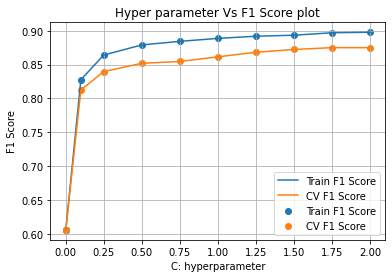

In [39]:
svm = SVC(gamma='auto')
parameters = {'C':[ 0.0001, 0.001, 0.1, 0.25, 0.50, 0.75, 1, 1.25, 1.5, 1.75, 2.0], 'kernel': ['linear']}
clf = GridSearchCV(svm, parameters,cv=10, scoring='f1_micro', return_train_score=True, verbose=10)
clf.fit(Train, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_C'])

train_score= results['mean_train_score']
cv_score = results['mean_test_score'] 
alpha =  results['param_C']

plt.plot(alpha, train_score, label='Train F1 Score')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
#plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(alpha, cv_score, label='CV F1 Score')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
#plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(alpha, train_score, label='Train F1 Score')
plt.scatter(alpha, cv_score, label='CV F1 Score')


plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("F1 Score")
plt.title("Hyper parameter Vs F1 Score plot")
plt.grid()
plt.show()

In [53]:
clf.best_params_

{'C': 1.5, 'kernel': 'linear'}

Number of misclassified points  12.07920792079208
-------------------------------------------------- Confusion matrix --------------------------------------------------


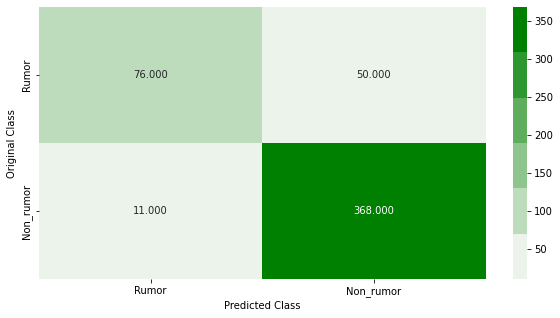

-------------------------------------------------- Precision matrix --------------------------------------------------


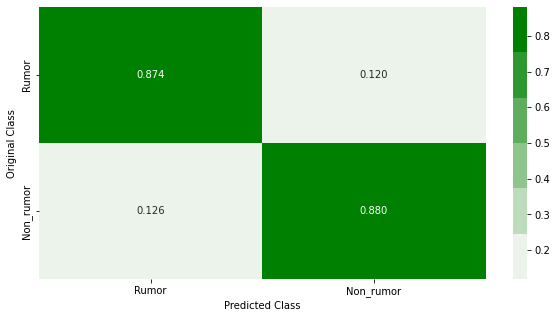

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


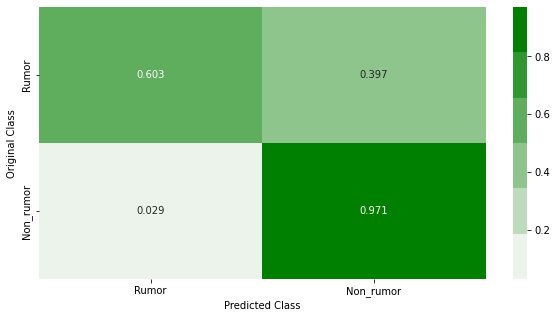

Sum of rows in Recall matrix [1. 1.]


In [37]:
svm_clf = SVC(C=1.5, gamma='auto', kernel='linear')
svm_clf.fit(Train, y_train)
plot_confusion_matrix(y_test, svm_clf.predict(Test))

Fitting 10 folds for each of 38 candidates, totalling 380 fits
[CV 1/10; 1/38] START C=0.0001, gamma=scale.....................................
[CV 1/10; 1/38] END C=0.0001, gamma=scale;, score=(train=0.751, test=0.754) total time=   0.1s
[CV 2/10; 1/38] START C=0.0001, gamma=scale.....................................
[CV 2/10; 1/38] END C=0.0001, gamma=scale;, score=(train=0.751, test=0.754) total time=   0.1s
[CV 3/10; 1/38] START C=0.0001, gamma=scale.....................................
[CV 3/10; 1/38] END C=0.0001, gamma=scale;, score=(train=0.751, test=0.754) total time=   0.1s
[CV 4/10; 1/38] START C=0.0001, gamma=scale.....................................
[CV 4/10; 1/38] END C=0.0001, gamma=scale;, score=(train=0.751, test=0.754) total time=   0.1s
[CV 5/10; 1/38] START C=0.0001, gamma=scale.....................................
[CV 5/10; 1/38] END C=0.0001, gamma=scale;, score=(train=0.752, test=0.746) total time=   0.1s
[CV 6/10; 1/38] START C=0.0001, gamma=scale..............

[CV 8/10; 5/38] END C=0.1, gamma=scale;, score=(train=0.752, test=0.752) total time=   0.1s
[CV 9/10; 5/38] START C=0.1, gamma=scale........................................
[CV 9/10; 5/38] END C=0.1, gamma=scale;, score=(train=0.752, test=0.752) total time=   0.1s
[CV 10/10; 5/38] START C=0.1, gamma=scale.......................................
[CV 10/10; 5/38] END C=0.1, gamma=scale;, score=(train=0.752, test=0.752) total time=   0.1s
[CV 1/10; 6/38] START C=0.1, gamma=auto.........................................
[CV 1/10; 6/38] END C=0.1, gamma=auto;, score=(train=0.751, test=0.754) total time=   0.1s
[CV 2/10; 6/38] START C=0.1, gamma=auto.........................................
[CV 2/10; 6/38] END C=0.1, gamma=auto;, score=(train=0.751, test=0.754) total time=   0.1s
[CV 3/10; 6/38] START C=0.1, gamma=auto.........................................
[CV 3/10; 6/38] END C=0.1, gamma=auto;, score=(train=0.751, test=0.754) total time=   0.1s
[CV 4/10; 6/38] START C=0.1, gamma=auto......

[CV 6/10; 10/38] END C=0.5, gamma=auto;, score=(train=0.752, test=0.746) total time=   0.1s
[CV 7/10; 10/38] START C=0.5, gamma=auto........................................
[CV 7/10; 10/38] END C=0.5, gamma=auto;, score=(train=0.752, test=0.752) total time=   0.1s
[CV 8/10; 10/38] START C=0.5, gamma=auto........................................
[CV 8/10; 10/38] END C=0.5, gamma=auto;, score=(train=0.752, test=0.752) total time=   0.1s
[CV 9/10; 10/38] START C=0.5, gamma=auto........................................
[CV 9/10; 10/38] END C=0.5, gamma=auto;, score=(train=0.752, test=0.752) total time=   0.1s
[CV 10/10; 10/38] START C=0.5, gamma=auto.......................................
[CV 10/10; 10/38] END C=0.5, gamma=auto;, score=(train=0.752, test=0.752) total time=   0.1s
[CV 1/10; 11/38] START C=0.75, gamma=scale......................................
[CV 1/10; 11/38] END C=0.75, gamma=scale;, score=(train=0.755, test=0.754) total time=   0.1s
[CV 2/10; 11/38] START C=0.75, gamma=sca

[CV 4/10; 15/38] END C=1.25, gamma=scale;, score=(train=0.774, test=0.763) total time=   0.1s
[CV 5/10; 15/38] START C=1.25, gamma=scale......................................
[CV 5/10; 15/38] END C=1.25, gamma=scale;, score=(train=0.763, test=0.771) total time=   0.1s
[CV 6/10; 15/38] START C=1.25, gamma=scale......................................
[CV 6/10; 15/38] END C=1.25, gamma=scale;, score=(train=0.770, test=0.763) total time=   0.1s
[CV 7/10; 15/38] START C=1.25, gamma=scale......................................
[CV 7/10; 15/38] END C=1.25, gamma=scale;, score=(train=0.776, test=0.761) total time=   0.1s
[CV 8/10; 15/38] START C=1.25, gamma=scale......................................
[CV 8/10; 15/38] END C=1.25, gamma=scale;, score=(train=0.771, test=0.778) total time=   0.1s
[CV 9/10; 15/38] START C=1.25, gamma=scale......................................
[CV 9/10; 15/38] END C=1.25, gamma=scale;, score=(train=0.777, test=0.752) total time=   0.1s
[CV 10/10; 15/38] START C=1.25,

[CV 2/10; 20/38] END C=1.75, gamma=auto;, score=(train=0.757, test=0.763) total time=   0.1s
[CV 3/10; 20/38] START C=1.75, gamma=auto.......................................
[CV 3/10; 20/38] END C=1.75, gamma=auto;, score=(train=0.753, test=0.771) total time=   0.1s
[CV 4/10; 20/38] START C=1.75, gamma=auto.......................................
[CV 4/10; 20/38] END C=1.75, gamma=auto;, score=(train=0.757, test=0.763) total time=   0.1s
[CV 5/10; 20/38] START C=1.75, gamma=auto.......................................
[CV 5/10; 20/38] END C=1.75, gamma=auto;, score=(train=0.756, test=0.746) total time=   0.1s
[CV 6/10; 20/38] START C=1.75, gamma=auto.......................................
[CV 6/10; 20/38] END C=1.75, gamma=auto;, score=(train=0.757, test=0.746) total time=   0.1s
[CV 7/10; 20/38] START C=1.75, gamma=auto.......................................
[CV 7/10; 20/38] END C=1.75, gamma=auto;, score=(train=0.758, test=0.752) total time=   0.1s
[CV 8/10; 20/38] START C=1.75, gamma=

[CV 10/10; 24/38] END C=4, gamma=auto;, score=(train=0.804, test=0.778) total time=   0.1s
[CV 1/10; 25/38] START C=6, gamma=scale.........................................
[CV 1/10; 25/38] END C=6, gamma=scale;, score=(train=0.841, test=0.814) total time=   0.1s
[CV 2/10; 25/38] START C=6, gamma=scale.........................................
[CV 2/10; 25/38] END C=6, gamma=scale;, score=(train=0.841, test=0.822) total time=   0.1s
[CV 3/10; 25/38] START C=6, gamma=scale.........................................
[CV 3/10; 25/38] END C=6, gamma=scale;, score=(train=0.843, test=0.839) total time=   0.1s
[CV 4/10; 25/38] START C=6, gamma=scale.........................................
[CV 4/10; 25/38] END C=6, gamma=scale;, score=(train=0.845, test=0.814) total time=   0.1s
[CV 5/10; 25/38] START C=6, gamma=scale.........................................
[CV 5/10; 25/38] END C=6, gamma=scale;, score=(train=0.837, test=0.864) total time=   0.1s
[CV 6/10; 25/38] START C=6, gamma=scale..........

[CV 8/10; 29/38] END C=10, gamma=scale;, score=(train=0.860, test=0.838) total time=   0.1s
[CV 9/10; 29/38] START C=10, gamma=scale........................................
[CV 9/10; 29/38] END C=10, gamma=scale;, score=(train=0.847, test=0.821) total time=   0.1s
[CV 10/10; 29/38] START C=10, gamma=scale.......................................
[CV 10/10; 29/38] END C=10, gamma=scale;, score=(train=0.856, test=0.803) total time=   0.1s
[CV 1/10; 30/38] START C=10, gamma=auto.........................................
[CV 1/10; 30/38] END C=10, gamma=auto;, score=(train=0.838, test=0.797) total time=   0.1s
[CV 2/10; 30/38] START C=10, gamma=auto.........................................
[CV 2/10; 30/38] END C=10, gamma=auto;, score=(train=0.837, test=0.814) total time=   0.1s
[CV 3/10; 30/38] START C=10, gamma=auto.........................................
[CV 3/10; 30/38] END C=10, gamma=auto;, score=(train=0.835, test=0.839) total time=   0.1s
[CV 4/10; 30/38] START C=10, gamma=auto......

[CV 6/10; 34/38] END C=15, gamma=auto;, score=(train=0.843, test=0.856) total time=   0.1s
[CV 7/10; 34/38] START C=15, gamma=auto.........................................
[CV 7/10; 34/38] END C=15, gamma=auto;, score=(train=0.848, test=0.821) total time=   0.1s
[CV 8/10; 34/38] START C=15, gamma=auto.........................................
[CV 8/10; 34/38] END C=15, gamma=auto;, score=(train=0.848, test=0.838) total time=   0.1s
[CV 9/10; 34/38] START C=15, gamma=auto.........................................
[CV 9/10; 34/38] END C=15, gamma=auto;, score=(train=0.848, test=0.821) total time=   0.1s
[CV 10/10; 34/38] START C=15, gamma=auto........................................
[CV 10/10; 34/38] END C=15, gamma=auto;, score=(train=0.850, test=0.812) total time=   0.1s
[CV 1/10; 35/38] START C=20, gamma=scale........................................
[CV 1/10; 35/38] END C=20, gamma=scale;, score=(train=0.871, test=0.864) total time=   0.1s
[CV 2/10; 35/38] START C=20, gamma=scale.......

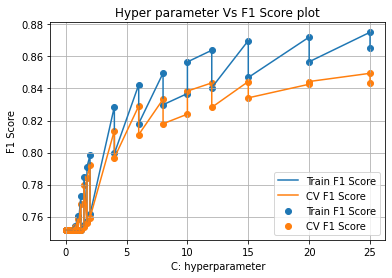

In [38]:
svm = SVC(kernel='rbf')
parameters = {'C':[ 0.0001, 0.001, 0.1, 0.25, 0.50, 0.75, 1, 1.25, 1.5, 1.75, 2.0, 4, 6, 8, 10, 12, 15, 20, 25], 'gamma':['scale', 'auto'],  }
clf = GridSearchCV(svm, parameters, cv=10, scoring='f1_micro', return_train_score=True,verbose=10)
clf.fit(Train, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_C'])

train_score= results['mean_train_score']
cv_score = results['mean_test_score'] 
alpha =  results['param_C']

plt.plot(alpha, train_score, label='Train F1 Score')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(alpha, cv_score, label='CV F1 Score')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(alpha, train_score, label='Train F1 Score')
plt.scatter(alpha, cv_score, label='CV F1 Score')


plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("F1 Score")
plt.title("Hyper parameter Vs F1 Score plot")
plt.grid()
plt.show()

In [56]:
clf.best_params_

{'C': 25, 'gamma': 'scale'}

Number of misclassified points  12.07920792079208
-------------------------------------------------- Confusion matrix --------------------------------------------------


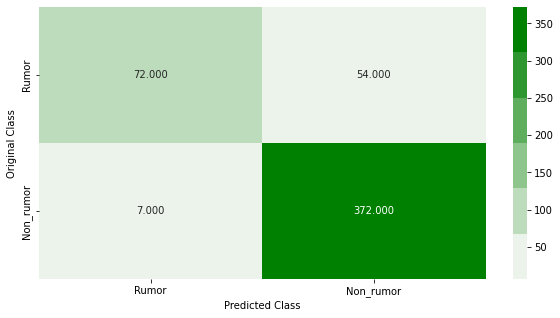

-------------------------------------------------- Precision matrix --------------------------------------------------


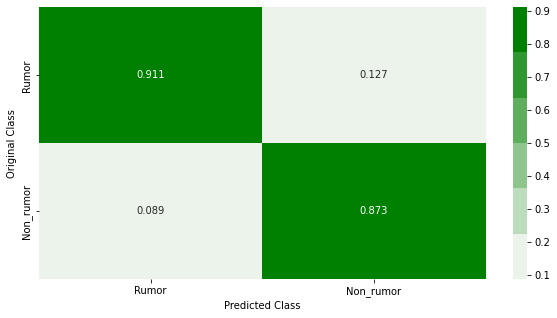

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


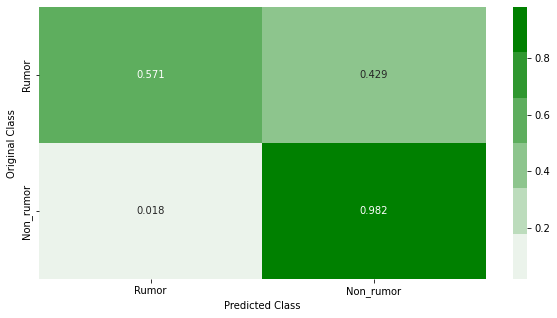

Sum of rows in Recall matrix [1. 1.]


In [39]:
svm_clf_rbf = SVC(C=25, gamma='scale', kernel='rbf')
svm_clf_rbf.fit(Train, y_train)
plot_confusion_matrix(y_test, svm_clf_rbf.predict(Test))

Fitting 10 folds for each of 176 candidates, totalling 1760 fits
[CV 2/10; 1/176] START C=0.0001, degree=2, gamma=scale..........................
[CV 2/10; 1/176] END C=0.0001, degree=2, gamma=scale;, score=(train=0.606, test=0.608) total time=   0.1s
[CV 10/10; 1/176] START C=0.0001, degree=2, gamma=scale.........................
[CV 10/10; 1/176] END C=0.0001, degree=2, gamma=scale;, score=(train=0.606, test=0.603) total time=   0.1s
[CV 1/10; 3/176] START C=0.0001, degree=3, gamma=scale..........................
[CV 1/10; 3/176] END C=0.0001, degree=3, gamma=scale;, score=(train=0.606, test=0.608) total time=   0.1s
[CV 7/10; 3/176] START C=0.0001, degree=3, gamma=scale..........................
[CV 7/10; 3/176] END C=0.0001, degree=3, gamma=scale;, score=(train=0.606, test=0.603) total time=   0.1s
[CV 5/10; 4/176] START C=0.0001, degree=3, gamma=auto...........................
[CV 5/10; 4/176] END C=0.0001, degree=3, gamma=auto;, score=(train=0.606, test=0.608) total time=   0.1s


[CV 8/10; 1/176] START C=0.0001, degree=2, gamma=scale..........................
[CV 8/10; 1/176] END C=0.0001, degree=2, gamma=scale;, score=(train=0.606, test=0.603) total time=   0.1s
[CV 2/10; 2/176] START C=0.0001, degree=2, gamma=auto...........................
[CV 2/10; 2/176] END C=0.0001, degree=2, gamma=auto;, score=(train=0.606, test=0.608) total time=   0.1s
[CV 2/10; 3/176] START C=0.0001, degree=3, gamma=scale..........................
[CV 2/10; 3/176] END C=0.0001, degree=3, gamma=scale;, score=(train=0.606, test=0.608) total time=   0.1s
[CV 1/10; 4/176] START C=0.0001, degree=3, gamma=auto...........................
[CV 1/10; 4/176] END C=0.0001, degree=3, gamma=auto;, score=(train=0.606, test=0.608) total time=   0.1s
[CV 6/10; 4/176] START C=0.0001, degree=3, gamma=auto...........................
[CV 6/10; 4/176] END C=0.0001, degree=3, gamma=auto;, score=(train=0.606, test=0.608) total time=   0.1s
[CV 6/10; 5/176] START C=0.0001, degree=4, gamma=scale..............

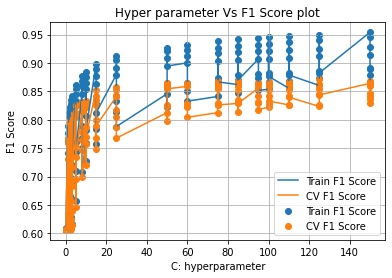

In [58]:
svm = SVC(kernel='poly')
parameters = {'C':[ 0.0001, 0.001, 0.1, 1,  1.5, 2.0, 2.5, 3, 5, 8, 10, 15, 25, 50, 60, 75, 85, 95, 100, 110, 125, 150], \
              'gamma':['scale', 'auto'], 'degree': [2,3,4,5]  }
clf = GridSearchCV(svm, parameters, cv=10, scoring='f1_micro', return_train_score=True, n_jobs=-1,verbose=10)
clf.fit(Train, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_C'])

train_score= results['mean_train_score']
cv_score = results['mean_test_score'] 
alpha =  results['param_C']

plt.plot(alpha, train_score, label='Train F1 Score')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(alpha, cv_score, label='CV F1 Score')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(alpha, train_score, label='Train F1 Score')
plt.scatter(alpha, cv_score, label='CV F1 Score')


plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("F1 Score")
plt.title("Hyper parameter Vs F1 Score plot")
plt.grid()
plt.show()

In [59]:
clf.best_params_

{'C': 125, 'degree': 5, 'gamma': 'scale'}

Number of misclassified points  10.693069306930694
-------------------------------------------------- Confusion matrix --------------------------------------------------


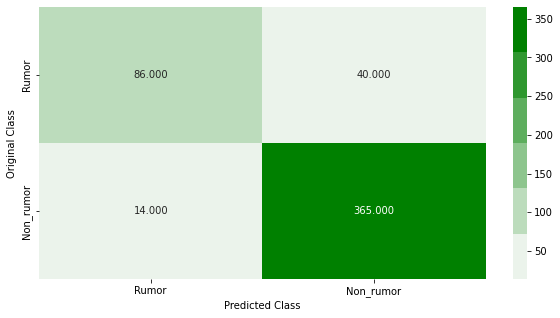

-------------------------------------------------- Precision matrix --------------------------------------------------


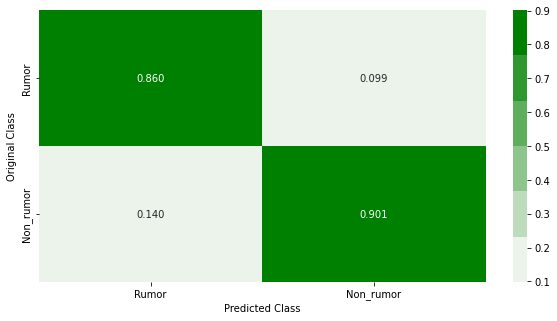

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


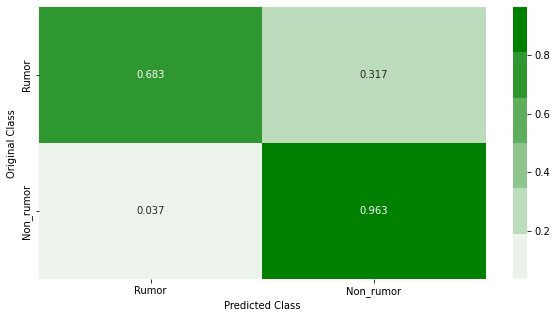

Sum of rows in Recall matrix [1. 1.]


In [40]:
svm_clf_poly = SVC(C=125, gamma='scale', degree=5, kernel='poly')
svm_clf_poly.fit(Train, y_train)
plot_confusion_matrix(y_test, svm_clf_poly.predict(Test))

Fitting 10 folds for each of 7 candidates, totalling 70 fits
[CV 9/10; 70/176] END C=5, degree=4, gamma=auto;, score=(train=0.703, test=0.712) total time=   0.1s
[CV 9/10; 71/176] START C=5, degree=5, gamma=scale..............................
[CV 9/10; 71/176] END C=5, degree=5, gamma=scale;, score=(train=0.861, test=0.836) total time=   0.1s
[CV 7/10; 72/176] START C=5, degree=5, gamma=auto...............................
[CV 7/10; 72/176] END C=5, degree=5, gamma=auto;, score=(train=0.653, test=0.658) total time=   0.1s
[CV 5/10; 73/176] START C=8, degree=2, gamma=scale..............................
[CV 5/10; 73/176] END C=8, degree=2, gamma=scale;, score=(train=0.855, test=0.797) total time=   0.1s
[CV 3/10; 74/176] START C=8, degree=2, gamma=auto...............................
[CV 3/10; 74/176] END C=8, degree=2, gamma=auto;, score=(train=0.795, test=0.703) total time=   0.1s
[CV 1/10; 75/176] START C=8, degree=3, gamma=scale..............................
[CV 1/10; 75/176] END C=8, 

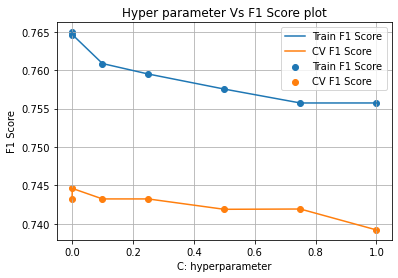

In [61]:
BNB = BernoulliNB()
parameters = {'alpha':[ 0.0001, 0.001, 0.1, 0.25, 0.50, 0.75, 1]}

clf = GridSearchCV(BNB, parameters, cv=10,n_jobs=-1, scoring='f1_micro', return_train_score=True,verbose=10)
clf.fit(Train, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
# print(results)
results = results.sort_values(['param_alpha'])

train_score= results['mean_train_score']
cv_score = results['mean_test_score'] 
alpha =  results['param_alpha']

plt.plot(alpha, train_score, label='Train F1 Score')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(alpha, cv_score, label='CV F1 Score')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(alpha, train_score, label='Train F1 Score')
plt.scatter(alpha, cv_score, label='CV F1 Score')

plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("F1 Score")
plt.title("Hyper parameter Vs F1 Score plot")
plt.grid()
plt.show()

In [62]:
clf.best_params_

{'alpha': 0.001}

Number of misclassified points  20.594059405940595
-------------------------------------------------- Confusion matrix --------------------------------------------------


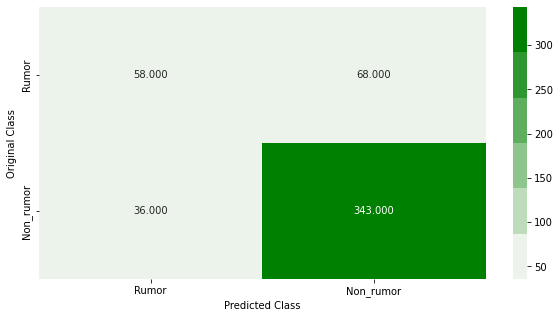

-------------------------------------------------- Precision matrix --------------------------------------------------


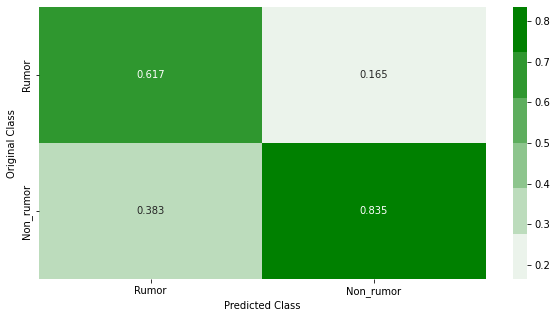

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


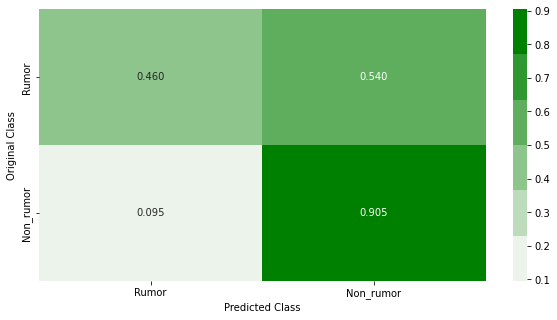

Sum of rows in Recall matrix [1. 1.]


In [41]:
BNB_clf = BernoulliNB(alpha= 0.001)
BNB_clf.fit(Train, y_train)
plot_confusion_matrix(y_test, BNB_clf.predict(Test))

Fitting 10 folds for each of 42 candidates, totalling 420 fits
[CV 1/10; 1/42] START C=0.001, penalty=l1, solver=newton-cg.....................
[CV 1/10; 1/42] END C=0.001, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/10; 1/42] START C=0.001, penalty=l1, solver=newton-cg.....................
[CV 2/10; 1/42] END C=0.001, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/10; 1/42] START C=0.001, penalty=l1, solver=newton-cg.....................
[CV 3/10; 1/42] END C=0.001, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/10; 1/42] START C=0.001, penalty=l1, solver=newton-cg.....................
[CV 4/10; 1/42] END C=0.001, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/10; 1/42] START C=0.001, penalty=l1, solver=newton-cg.....................
[CV 5/10; 1/42] END C=0.001, penalty=l1, solver=newton-cg;, score=(train=nan, test=nan) total time=   0.

[CV 4/10; 6/42] END C=0.001, penalty=l2, solver=liblinear;, score=(train=0.606, test=0.608) total time=   0.0s
[CV 5/10; 6/42] START C=0.001, penalty=l2, solver=liblinear.....................
[CV 5/10; 6/42] END C=0.001, penalty=l2, solver=liblinear;, score=(train=0.606, test=0.608) total time=   0.0s
[CV 6/10; 6/42] START C=0.001, penalty=l2, solver=liblinear.....................
[CV 6/10; 6/42] END C=0.001, penalty=l2, solver=liblinear;, score=(train=0.606, test=0.608) total time=   0.0s
[CV 7/10; 6/42] START C=0.001, penalty=l2, solver=liblinear.....................
[CV 7/10; 6/42] END C=0.001, penalty=l2, solver=liblinear;, score=(train=0.606, test=0.603) total time=   0.0s
[CV 8/10; 6/42] START C=0.001, penalty=l2, solver=liblinear.....................
[CV 8/10; 6/42] END C=0.001, penalty=l2, solver=liblinear;, score=(train=0.606, test=0.603) total time=   0.0s
[CV 9/10; 6/42] START C=0.001, penalty=l2, solver=liblinear.....................
[CV 9/10; 6/42] END C=0.001, penalty=l2,

[CV 6/10; 11/42] END C=0.01, penalty=l2, solver=lbfgs;, score=(train=0.678, test=0.676) total time=   0.0s
[CV 7/10; 11/42] START C=0.01, penalty=l2, solver=lbfgs.........................
[CV 7/10; 11/42] END C=0.01, penalty=l2, solver=lbfgs;, score=(train=0.676, test=0.671) total time=   0.0s
[CV 8/10; 11/42] START C=0.01, penalty=l2, solver=lbfgs.........................
[CV 8/10; 11/42] END C=0.01, penalty=l2, solver=lbfgs;, score=(train=0.679, test=0.658) total time=   0.0s
[CV 9/10; 11/42] START C=0.01, penalty=l2, solver=lbfgs.........................
[CV 9/10; 11/42] END C=0.01, penalty=l2, solver=lbfgs;, score=(train=0.676, test=0.685) total time=   0.0s
[CV 10/10; 11/42] START C=0.01, penalty=l2, solver=lbfgs........................
[CV 10/10; 11/42] END C=0.01, penalty=l2, solver=lbfgs;, score=(train=0.674, test=0.685) total time=   0.0s
[CV 1/10; 12/42] START C=0.01, penalty=l2, solver=liblinear.....................
[CV 1/10; 12/42] END C=0.01, penalty=l2, solver=liblinear;,

[CV 10/10; 15/42] END C=0.1, penalty=l1, solver=liblinear;, score=(train=0.713, test=0.685) total time=   0.0s
[CV 1/10; 16/42] START C=0.1, penalty=l2, solver=newton-cg......................
[CV 1/10; 16/42] END C=0.1, penalty=l2, solver=newton-cg;, score=(train=0.813, test=0.797) total time=   0.0s
[CV 2/10; 16/42] START C=0.1, penalty=l2, solver=newton-cg......................
[CV 2/10; 16/42] END C=0.1, penalty=l2, solver=newton-cg;, score=(train=0.813, test=0.851) total time=   0.0s
[CV 3/10; 16/42] START C=0.1, penalty=l2, solver=newton-cg......................
[CV 3/10; 16/42] END C=0.1, penalty=l2, solver=newton-cg;, score=(train=0.816, test=0.743) total time=   0.0s
[CV 4/10; 16/42] START C=0.1, penalty=l2, solver=newton-cg......................
[CV 4/10; 16/42] END C=0.1, penalty=l2, solver=newton-cg;, score=(train=0.807, test=0.824) total time=   0.0s
[CV 5/10; 16/42] START C=0.1, penalty=l2, solver=newton-cg......................
[CV 5/10; 16/42] END C=0.1, penalty=l2, solv

[CV 1/10; 21/42] END C=1.0, penalty=l1, solver=liblinear;, score=(train=0.860, test=0.851) total time=   0.3s
[CV 2/10; 21/42] START C=1.0, penalty=l1, solver=liblinear......................
[CV 2/10; 21/42] END C=1.0, penalty=l1, solver=liblinear;, score=(train=0.863, test=0.824) total time=   0.2s
[CV 3/10; 21/42] START C=1.0, penalty=l1, solver=liblinear......................
[CV 3/10; 21/42] END C=1.0, penalty=l1, solver=liblinear;, score=(train=0.858, test=0.811) total time=   0.3s
[CV 4/10; 21/42] START C=1.0, penalty=l1, solver=liblinear......................
[CV 4/10; 21/42] END C=1.0, penalty=l1, solver=liblinear;, score=(train=0.855, test=0.851) total time=   0.2s
[CV 5/10; 21/42] START C=1.0, penalty=l1, solver=liblinear......................
[CV 5/10; 21/42] END C=1.0, penalty=l1, solver=liblinear;, score=(train=0.853, test=0.811) total time=   0.2s
[CV 6/10; 21/42] START C=1.0, penalty=l1, solver=liblinear......................
[CV 6/10; 21/42] END C=1.0, penalty=l1, solve

[CV 1/10; 27/42] END C=10.0, penalty=l1, solver=liblinear;, score=(train=0.924, test=0.824) total time=   1.2s
[CV 2/10; 27/42] START C=10.0, penalty=l1, solver=liblinear.....................
[CV 2/10; 27/42] END C=10.0, penalty=l1, solver=liblinear;, score=(train=0.915, test=0.932) total time=   1.4s
[CV 3/10; 27/42] START C=10.0, penalty=l1, solver=liblinear.....................
[CV 3/10; 27/42] END C=10.0, penalty=l1, solver=liblinear;, score=(train=0.926, test=0.824) total time=   1.4s
[CV 4/10; 27/42] START C=10.0, penalty=l1, solver=liblinear.....................
[CV 4/10; 27/42] END C=10.0, penalty=l1, solver=liblinear;, score=(train=0.917, test=0.878) total time=   1.3s
[CV 5/10; 27/42] START C=10.0, penalty=l1, solver=liblinear.....................
[CV 5/10; 27/42] END C=10.0, penalty=l1, solver=liblinear;, score=(train=0.918, test=0.878) total time=   1.7s
[CV 6/10; 27/42] START C=10.0, penalty=l1, solver=liblinear.....................
[CV 6/10; 27/42] END C=10.0, penalty=l1,

[CV 1/10; 33/42] END C=100.0, penalty=l1, solver=liblinear;, score=(train=0.952, test=0.892) total time=   7.6s
[CV 2/10; 33/42] START C=100.0, penalty=l1, solver=liblinear....................
[CV 2/10; 33/42] END C=100.0, penalty=l1, solver=liblinear;, score=(train=0.946, test=0.919) total time=   9.9s
[CV 3/10; 33/42] START C=100.0, penalty=l1, solver=liblinear....................
[CV 3/10; 33/42] END C=100.0, penalty=l1, solver=liblinear;, score=(train=0.947, test=0.851) total time=   8.8s
[CV 4/10; 33/42] START C=100.0, penalty=l1, solver=liblinear....................
[CV 4/10; 33/42] END C=100.0, penalty=l1, solver=liblinear;, score=(train=0.938, test=0.919) total time=   9.3s
[CV 5/10; 33/42] START C=100.0, penalty=l1, solver=liblinear....................
[CV 5/10; 33/42] END C=100.0, penalty=l1, solver=liblinear;, score=(train=0.958, test=0.878) total time=   7.0s
[CV 6/10; 33/42] START C=100.0, penalty=l1, solver=liblinear....................
[CV 6/10; 33/42] END C=100.0, penal

/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

[CV 1/10; 35/42] END C=100.0, penalty=l2, solver=lbfgs;, score=(train=0.929, test=0.865) total time=   0.2s
[CV 2/10; 35/42] START C=100.0, penalty=l2, solver=lbfgs........................
[CV 2/10; 35/42] END C=100.0, penalty=l2, solver=lbfgs;, score=(train=0.918, test=0.932) total time=   0.2s
[CV 3/10; 35/42] START C=100.0, penalty=l2, solver=lbfgs........................


/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/10; 35/42] END C=100.0, penalty=l2, solver=lbfgs;, score=(train=0.931, test=0.838) total time=   0.2s
[CV 4/10; 35/42] START C=100.0, penalty=l2, solver=lbfgs........................


/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

[CV 4/10; 35/42] END C=100.0, penalty=l2, solver=lbfgs;, score=(train=0.924, test=0.932) total time=   0.2s
[CV 5/10; 35/42] START C=100.0, penalty=l2, solver=lbfgs........................
[CV 5/10; 35/42] END C=100.0, penalty=l2, solver=lbfgs;, score=(train=0.926, test=0.865) total time=   0.2s
[CV 6/10; 35/42] START C=100.0, penalty=l2, solver=lbfgs........................


/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

[CV 6/10; 35/42] END C=100.0, penalty=l2, solver=lbfgs;, score=(train=0.931, test=0.865) total time=   0.3s
[CV 7/10; 35/42] START C=100.0, penalty=l2, solver=lbfgs........................
[CV 7/10; 35/42] END C=100.0, penalty=l2, solver=lbfgs;, score=(train=0.931, test=0.877) total time=   0.2s
[CV 8/10; 35/42] START C=100.0, penalty=l2, solver=lbfgs........................


/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 8/10; 35/42] END C=100.0, penalty=l2, solver=lbfgs;, score=(train=0.928, test=0.863) total time=   0.2s
[CV 9/10; 35/42] START C=100.0, penalty=l2, solver=lbfgs........................


/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 9/10; 35/42] END C=100.0, penalty=l2, solver=lbfgs;, score=(train=0.931, test=0.849) total time=   0.3s
[CV 10/10; 35/42] START C=100.0, penalty=l2, solver=lbfgs.......................


/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 10/10; 35/42] END C=100.0, penalty=l2, solver=lbfgs;, score=(train=0.932, test=0.863) total time=   0.3s
[CV 1/10; 36/42] START C=100.0, penalty=l2, solver=liblinear....................
[CV 1/10; 36/42] END C=100.0, penalty=l2, solver=liblinear;, score=(train=0.927, test=0.851) total time=   0.1s
[CV 2/10; 36/42] START C=100.0, penalty=l2, solver=liblinear....................
[CV 2/10; 36/42] END C=100.0, penalty=l2, solver=liblinear;, score=(train=0.918, test=0.932) total time=   0.1s
[CV 3/10; 36/42] START C=100.0, penalty=l2, solver=liblinear....................
[CV 3/10; 36/42] END C=100.0, penalty=l2, solver=liblinear;, score=(train=0.932, test=0.838) total time=   0.1s
[CV 4/10; 36/42] START C=100.0, penalty=l2, solver=liblinear....................
[CV 4/10; 36/42] END C=100.0, penalty=l2, solver=liblinear;, score=(train=0.926, test=0.932) total time=   0.1s
[CV 5/10; 36/42] START C=100.0, penalty=l2, solver=liblinear....................
[CV 5/10; 36/42] END C=100.0, penalty=

[CV 7/10; 142/176] START C=95, degree=4, gamma=auto.............................
[CV 7/10; 142/176] END C=95, degree=4, gamma=auto;, score=(train=0.870, test=0.808) total time=   0.1s
[CV 5/10; 143/176] START C=95, degree=5, gamma=scale............................
[CV 5/10; 143/176] END C=95, degree=5, gamma=scale;, score=(train=0.944, test=0.824) total time=   0.1s
[CV 2/10; 144/176] START C=95, degree=5, gamma=auto.............................
[CV 2/10; 144/176] END C=95, degree=5, gamma=auto;, score=(train=0.852, test=0.878) total time=   0.1s
[CV 10/10; 144/176] START C=95, degree=5, gamma=auto............................
[CV 10/10; 144/176] END C=95, degree=5, gamma=auto;, score=(train=0.849, test=0.836) total time=   0.1s
[CV 10/10; 145/176] START C=100, degree=2, gamma=scale..........................
[CV 10/10; 145/176] END C=100, degree=2, gamma=scale;, score=(train=0.913, test=0.836) total time=   0.1s
[CV 7/10; 146/176] START C=100, degree=2, gamma=auto.......................

[CV 9/10; 143/176] START C=95, degree=5, gamma=scale............................
[CV 9/10; 143/176] END C=95, degree=5, gamma=scale;, score=(train=0.943, test=0.849) total time=   0.1s
[CV 6/10; 144/176] START C=95, degree=5, gamma=auto.............................
[CV 6/10; 144/176] END C=95, degree=5, gamma=auto;, score=(train=0.850, test=0.757) total time=   0.1s
[CV 5/10; 145/176] START C=100, degree=2, gamma=scale...........................
[CV 5/10; 145/176] END C=100, degree=2, gamma=scale;, score=(train=0.906, test=0.838) total time=   0.1s
[CV 3/10; 146/176] START C=100, degree=2, gamma=auto............................
[CV 3/10; 146/176] END C=100, degree=2, gamma=auto;, score=(train=0.881, test=0.797) total time=   0.1s
[CV 10/10; 146/176] START C=100, degree=2, gamma=auto...........................
[CV 10/10; 146/176] END C=100, degree=2, gamma=auto;, score=(train=0.875, test=0.849) total time=   0.1s
[CV 9/10; 147/176] START C=100, degree=3, gamma=scale.....................

[CV 4/10; 142/176] START C=95, degree=4, gamma=auto.............................
[CV 4/10; 142/176] END C=95, degree=4, gamma=auto;, score=(train=0.856, test=0.878) total time=   0.1s
[CV 3/10; 143/176] START C=95, degree=5, gamma=scale............................
[CV 3/10; 143/176] END C=95, degree=5, gamma=scale;, score=(train=0.946, test=0.851) total time=   0.1s
[CV 10/10; 143/176] START C=95, degree=5, gamma=scale...........................
[CV 10/10; 143/176] END C=95, degree=5, gamma=scale;, score=(train=0.946, test=0.863) total time=   0.1s
[CV 8/10; 144/176] START C=95, degree=5, gamma=auto.............................
[CV 8/10; 144/176] END C=95, degree=5, gamma=auto;, score=(train=0.851, test=0.836) total time=   0.1s
[CV 7/10; 145/176] START C=100, degree=2, gamma=scale...........................
[CV 7/10; 145/176] END C=100, degree=2, gamma=scale;, score=(train=0.906, test=0.877) total time=   0.1s
[CV 5/10; 146/176] START C=100, degree=2, gamma=auto.......................

[CV 8/10; 39/42] END C=1000.0, penalty=l1, solver=liblinear;, score=(train=0.958, test=0.863) total time=  24.4s
[CV 9/10; 39/42] START C=1000.0, penalty=l1, solver=liblinear...................
[CV 9/10; 39/42] END C=1000.0, penalty=l1, solver=liblinear;, score=(train=0.967, test=0.877) total time=  22.6s
[CV 10/10; 39/42] START C=1000.0, penalty=l1, solver=liblinear..................
[CV 10/10; 39/42] END C=1000.0, penalty=l1, solver=liblinear;, score=(train=0.964, test=0.877) total time=  24.3s
[CV 1/10; 40/42] START C=1000.0, penalty=l2, solver=newton-cg...................
[CV 1/10; 40/42] END C=1000.0, penalty=l2, solver=newton-cg;, score=(train=0.949, test=0.892) total time=   0.1s
[CV 2/10; 40/42] START C=1000.0, penalty=l2, solver=newton-cg...................
[CV 2/10; 40/42] END C=1000.0, penalty=l2, solver=newton-cg;, score=(train=0.941, test=0.892) total time=   0.1s
[CV 3/10; 40/42] START C=1000.0, penalty=l2, solver=newton-cg...................
[CV 3/10; 40/42] END C=1000.0

/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

[CV 1/10; 41/42] END C=1000.0, penalty=l2, solver=lbfgs;, score=(train=0.946, test=0.892) total time=   0.2s
[CV 2/10; 41/42] START C=1000.0, penalty=l2, solver=lbfgs.......................
[CV 2/10; 41/42] END C=1000.0, penalty=l2, solver=lbfgs;, score=(train=0.934, test=0.919) total time=   0.2s
[CV 3/10; 41/42] START C=1000.0, penalty=l2, solver=lbfgs.......................


/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

[CV 3/10; 41/42] END C=1000.0, penalty=l2, solver=lbfgs;, score=(train=0.938, test=0.851) total time=   0.2s
[CV 4/10; 41/42] START C=1000.0, penalty=l2, solver=lbfgs.......................
[CV 4/10; 41/42] END C=1000.0, penalty=l2, solver=lbfgs;, score=(train=0.932, test=0.946) total time=   0.1s
[CV 5/10; 41/42] START C=1000.0, penalty=l2, solver=lbfgs.......................


/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

[CV 5/10; 41/42] END C=1000.0, penalty=l2, solver=lbfgs;, score=(train=0.938, test=0.851) total time=   0.2s
[CV 6/10; 41/42] START C=1000.0, penalty=l2, solver=lbfgs.......................
[CV 6/10; 41/42] END C=1000.0, penalty=l2, solver=lbfgs;, score=(train=0.949, test=0.851) total time=   0.1s
[CV 7/10; 41/42] START C=1000.0, penalty=l2, solver=lbfgs.......................


/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

[CV 7/10; 41/42] END C=1000.0, penalty=l2, solver=lbfgs;, score=(train=0.944, test=0.863) total time=   0.2s
[CV 8/10; 41/42] START C=1000.0, penalty=l2, solver=lbfgs.......................
[CV 8/10; 41/42] END C=1000.0, penalty=l2, solver=lbfgs;, score=(train=0.935, test=0.849) total time=   0.2s
[CV 9/10; 41/42] START C=1000.0, penalty=l2, solver=lbfgs.......................


/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

[CV 9/10; 41/42] END C=1000.0, penalty=l2, solver=lbfgs;, score=(train=0.947, test=0.877) total time=   0.2s
[CV 10/10; 41/42] START C=1000.0, penalty=l2, solver=lbfgs......................
[CV 10/10; 41/42] END C=1000.0, penalty=l2, solver=lbfgs;, score=(train=0.938, test=0.890) total time=   0.1s
[CV 1/10; 42/42] START C=1000.0, penalty=l2, solver=liblinear...................
[CV 1/10; 42/42] END C=1000.0, penalty=l2, solver=liblinear;, score=(train=0.949, test=0.892) total time=   0.1s
[CV 2/10; 42/42] START C=1000.0, penalty=l2, solver=liblinear...................
[CV 2/10; 42/42] END C=1000.0, penalty=l2, solver=liblinear;, score=(train=0.941, test=0.892) total time=   0.1s
[CV 3/10; 42/42] START C=1000.0, penalty=l2, solver=liblinear...................
[CV 3/10; 42/42] END C=1000.0, penalty=l2, solver=liblinear;, score=(train=0.946, test=0.851) total time=   0.1s
[CV 4/10; 42/42] START C=1000.0, penalty=l2, solver=liblinear...................
[CV 4/10; 42/42] END C=1000.0, penalt

/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
140 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/s

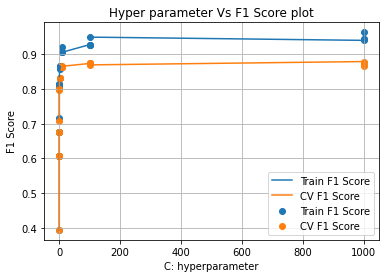

In [64]:
LR = LogisticRegression(max_iter=500, random_state=42)
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}
clf = GridSearchCV(LR, parameters, cv=10, scoring='f1_micro', return_train_score=True,verbose=10)
clf.fit(Train, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_C'])

train_score= results['mean_train_score']
cv_score = results['mean_test_score'] 
alpha =  results['param_C']

plt.plot(alpha, train_score, label='Train F1 Score')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(alpha, cv_score, label='CV F1 Score')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(alpha, train_score, label='Train F1 Score')
plt.scatter(alpha, cv_score, label='CV F1 Score')

plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("F1 Score")
plt.title("Hyper parameter Vs F1 Score plot")
plt.grid()
plt.show()

In [65]:
clf.best_params_

{'C': 1000.0, 'penalty': 'l2', 'solver': 'lbfgs'}

Number of misclassified points  10.495049504950495
-------------------------------------------------- Confusion matrix --------------------------------------------------


/Users/zenithjhony/miniforge3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


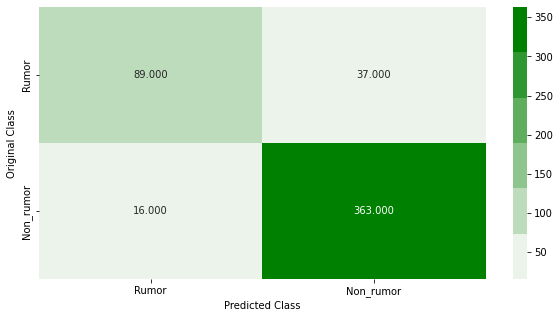

-------------------------------------------------- Precision matrix --------------------------------------------------


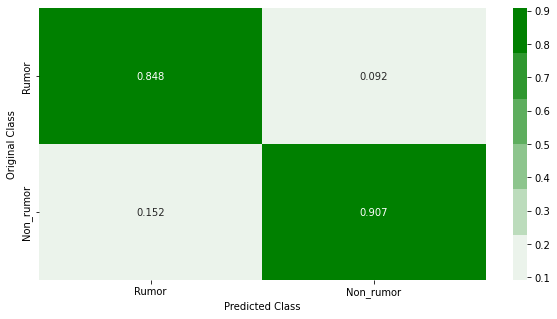

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


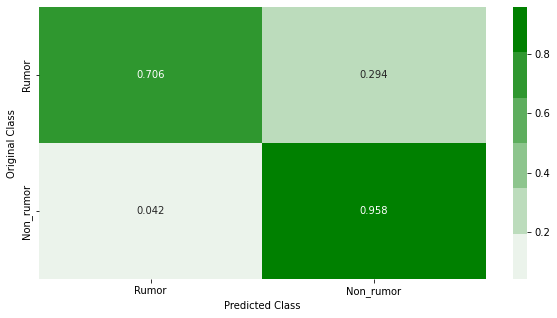

Sum of rows in Recall matrix [1. 1.]


In [42]:
LR_clf = LogisticRegression(C= 100, penalty='l2', solver='lbfgs')
LR_clf.fit(Train, y_train)
plot_confusion_matrix(y_test, LR_clf.predict(Test))

Fitting 10 folds for each of 224 candidates, totalling 2240 fits


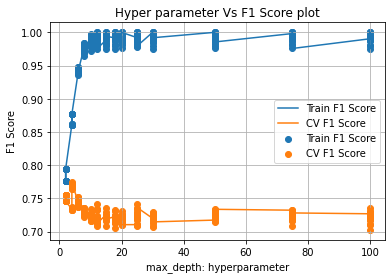

In [67]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier()
parameters = {'criterion':['gini', 'entropy'], 'max_depth': [2, 4, 6, 8, 10, 12, 15, 18, 20, 25, 30, 50, 75, 100], \
             'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 10]}
clf = GridSearchCV(DTC, parameters, cv=10, scoring='f1_micro', n_jobs=-1, return_train_score=True,verbose=10)
clf.fit(Train, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_max_depth'])

train_score= results['mean_train_score']
cv_score = results['mean_test_score'] 
alpha =  results['param_max_depth']

plt.plot(alpha, train_score, label='Train F1 Score')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(alpha, cv_score, label='CV F1 Score')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(alpha, train_score, label='Train F1 Score')
plt.scatter(alpha, cv_score, label='CV F1 Score')

plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("F1 Score")
plt.title("Hyper parameter Vs F1 Score plot")
plt.grid()
plt.show()

In [68]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 10}

Number of misclassified points  17.62376237623762
-------------------------------------------------- Confusion matrix --------------------------------------------------


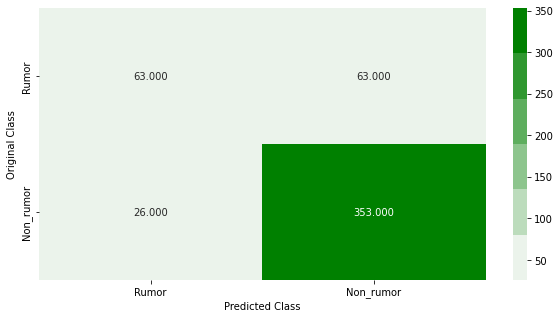

-------------------------------------------------- Precision matrix --------------------------------------------------


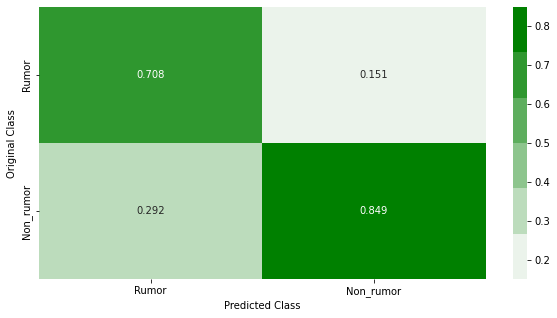

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


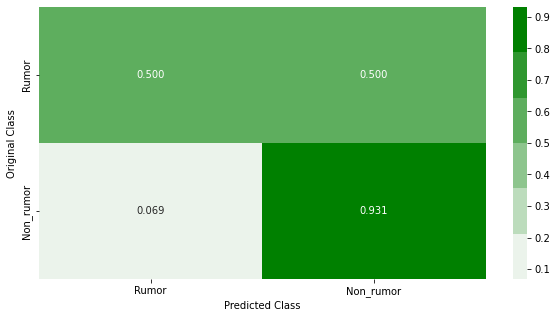

Sum of rows in Recall matrix [1. 1.]


In [43]:
DTC_clf = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_split=10)
DTC_clf.fit(Train, y_train)
plot_confusion_matrix(y_test, DTC_clf.predict(Test))

Fitting 10 folds for each of 12 candidates, totalling 120 fits


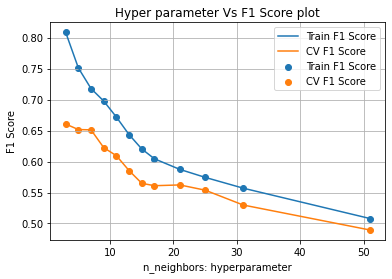

In [70]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
KNN = KNeighborsClassifier()
parameters = {'n_neighbors':[3, 5, 7, 9, 11, 13, 15, 17, 21, 25, 31, 51, ]}
clf = GridSearchCV(KNN, parameters, cv=10, scoring='f1_macro', n_jobs=-1, return_train_score=True,verbose=10)
clf.fit(Train, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_n_neighbors'])

train_score= results['mean_train_score']
cv_score = results['mean_test_score'] 
alpha =  results['param_n_neighbors']

plt.plot(alpha, train_score, label='Train F1 Score')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(alpha, cv_score, label='CV F1 Score')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(alpha, train_score, label='Train F1 Score')
plt.scatter(alpha, cv_score, label='CV F1 Score')

plt.legend()
plt.xlabel("n_neighbors: hyperparameter")
plt.ylabel("F1 Score")
plt.title("Hyper parameter Vs F1 Score plot")
plt.grid()
plt.show()

In [71]:
clf.best_params_

{'n_neighbors': 3}

Number of misclassified points  21.980198019801982
-------------------------------------------------- Confusion matrix --------------------------------------------------


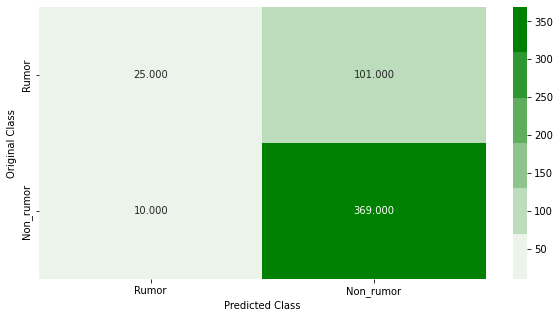

-------------------------------------------------- Precision matrix --------------------------------------------------


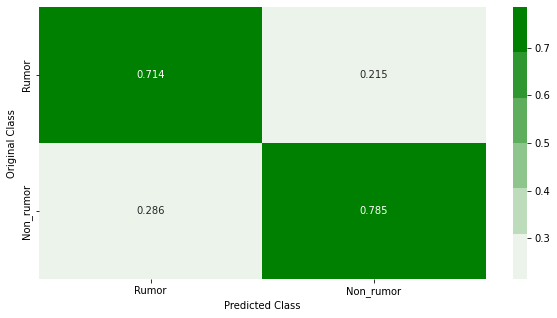

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


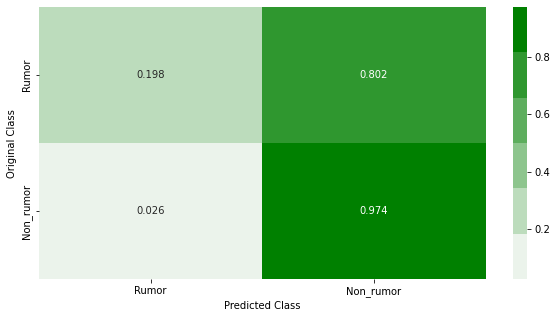

Sum of rows in Recall matrix [1. 1.]


In [44]:
from sklearn.neighbors import KNeighborsClassifier
KNN_clf = KNeighborsClassifier(n_neighbors=3)
KNN_clf.fit(Train, y_train)
plot_confusion_matrix(y_test, KNN_clf.predict(Test))

Fitting 10 folds for each of 54 candidates, totalling 540 fits
[CV 8/10; 1/224] START criterion=gini, max_depth=2, min_samples_split=2.........
[CV 8/10; 1/224] END criterion=gini, max_depth=2, min_samples_split=2;, score=(train=0.805, test=0.712) total time=   0.0s
[CV 9/10; 1/224] START criterion=gini, max_depth=2, min_samples_split=2.........
[CV 9/10; 1/224] END criterion=gini, max_depth=2, min_samples_split=2;, score=(train=0.810, test=0.671) total time=   0.0s
[CV 2/10; 3/224] START criterion=gini, max_depth=2, min_samples_split=4.........
[CV 2/10; 3/224] END criterion=gini, max_depth=2, min_samples_split=4;, score=(train=0.781, test=0.811) total time=   0.0s
[CV 1/10; 4/224] START criterion=gini, max_depth=2, min_samples_split=5.........
[CV 1/10; 4/224] END criterion=gini, max_depth=2, min_samples_split=5;, score=(train=0.779, test=0.824) total time=   0.0s
[CV 9/10; 4/224] START criterion=gini, max_depth=2, min_samples_split=5.........
[CV 9/10; 4/224] END criterion=gini, max

[CV 5/10; 1/224] START criterion=gini, max_depth=2, min_samples_split=2.........
[CV 5/10; 1/224] END criterion=gini, max_depth=2, min_samples_split=2;, score=(train=0.787, test=0.703) total time=   0.0s
[CV 10/10; 1/224] START criterion=gini, max_depth=2, min_samples_split=2........
[CV 10/10; 1/224] END criterion=gini, max_depth=2, min_samples_split=2;, score=(train=0.808, test=0.767) total time=   0.0s
[CV 10/10; 2/224] START criterion=gini, max_depth=2, min_samples_split=3........
[CV 10/10; 2/224] END criterion=gini, max_depth=2, min_samples_split=3;, score=(train=0.808, test=0.767) total time=   0.0s
[CV 7/10; 3/224] START criterion=gini, max_depth=2, min_samples_split=4.........
[CV 7/10; 3/224] END criterion=gini, max_depth=2, min_samples_split=4;, score=(train=0.807, test=0.699) total time=   0.0s
[CV 5/10; 4/224] START criterion=gini, max_depth=2, min_samples_split=5.........
[CV 5/10; 4/224] END criterion=gini, max_depth=2, min_samples_split=5;, score=(train=0.787, test=0.70

[CV 4/10; 1/224] START criterion=gini, max_depth=2, min_samples_split=2.........
[CV 4/10; 1/224] END criterion=gini, max_depth=2, min_samples_split=2;, score=(train=0.787, test=0.703) total time=   0.1s
[CV 3/10; 2/224] START criterion=gini, max_depth=2, min_samples_split=3.........
[CV 3/10; 2/224] END criterion=gini, max_depth=2, min_samples_split=3;, score=(train=0.782, test=0.797) total time=   0.0s
[CV 3/10; 3/224] START criterion=gini, max_depth=2, min_samples_split=4.........
[CV 3/10; 3/224] END criterion=gini, max_depth=2, min_samples_split=4;, score=(train=0.782, test=0.797) total time=   0.0s
[CV 10/10; 3/224] START criterion=gini, max_depth=2, min_samples_split=4........
[CV 10/10; 3/224] END criterion=gini, max_depth=2, min_samples_split=4;, score=(train=0.808, test=0.767) total time=   0.0s
[CV 4/10; 4/224] START criterion=gini, max_depth=2, min_samples_split=5.........
[CV 4/10; 4/224] END criterion=gini, max_depth=2, min_samples_split=5;, score=(train=0.787, test=0.703

[CV 2/10; 1/224] START criterion=gini, max_depth=2, min_samples_split=2.........
[CV 2/10; 1/224] END criterion=gini, max_depth=2, min_samples_split=2;, score=(train=0.781, test=0.811) total time=   0.0s
[CV 1/10; 2/224] START criterion=gini, max_depth=2, min_samples_split=3.........
[CV 1/10; 2/224] END criterion=gini, max_depth=2, min_samples_split=3;, score=(train=0.779, test=0.824) total time=   0.0s
[CV 9/10; 2/224] START criterion=gini, max_depth=2, min_samples_split=3.........
[CV 9/10; 2/224] END criterion=gini, max_depth=2, min_samples_split=3;, score=(train=0.810, test=0.671) total time=   0.0s
[CV 6/10; 3/224] START criterion=gini, max_depth=2, min_samples_split=4.........
[CV 6/10; 3/224] END criterion=gini, max_depth=2, min_samples_split=4;, score=(train=0.799, test=0.770) total time=   0.0s
[CV 6/10; 4/224] START criterion=gini, max_depth=2, min_samples_split=5.........
[CV 6/10; 4/224] END criterion=gini, max_depth=2, min_samples_split=5;, score=(train=0.799, test=0.770)

[CV 3/10; 1/224] START criterion=gini, max_depth=2, min_samples_split=2.........
[CV 3/10; 1/224] END criterion=gini, max_depth=2, min_samples_split=2;, score=(train=0.782, test=0.797) total time=   0.0s
[CV 2/10; 2/224] START criterion=gini, max_depth=2, min_samples_split=3.........
[CV 2/10; 2/224] END criterion=gini, max_depth=2, min_samples_split=3;, score=(train=0.781, test=0.811) total time=   0.0s
[CV 8/10; 2/224] START criterion=gini, max_depth=2, min_samples_split=3.........
[CV 8/10; 2/224] END criterion=gini, max_depth=2, min_samples_split=3;, score=(train=0.805, test=0.712) total time=   0.0s
[CV 5/10; 3/224] START criterion=gini, max_depth=2, min_samples_split=4.........
[CV 5/10; 3/224] END criterion=gini, max_depth=2, min_samples_split=4;, score=(train=0.787, test=0.703) total time=   0.0s
[CV 3/10; 4/224] START criterion=gini, max_depth=2, min_samples_split=5.........
[CV 3/10; 4/224] END criterion=gini, max_depth=2, min_samples_split=5;, score=(train=0.782, test=0.797)

[CV 6/10; 1/224] START criterion=gini, max_depth=2, min_samples_split=2.........
[CV 6/10; 1/224] END criterion=gini, max_depth=2, min_samples_split=2;, score=(train=0.799, test=0.770) total time=   0.0s
[CV 6/10; 2/224] START criterion=gini, max_depth=2, min_samples_split=3.........
[CV 6/10; 2/224] END criterion=gini, max_depth=2, min_samples_split=3;, score=(train=0.799, test=0.770) total time=   0.0s
[CV 1/10; 3/224] START criterion=gini, max_depth=2, min_samples_split=4.........
[CV 1/10; 3/224] END criterion=gini, max_depth=2, min_samples_split=4;, score=(train=0.779, test=0.824) total time=   0.0s
[CV 9/10; 3/224] START criterion=gini, max_depth=2, min_samples_split=4.........
[CV 9/10; 3/224] END criterion=gini, max_depth=2, min_samples_split=4;, score=(train=0.810, test=0.671) total time=   0.0s
[CV 8/10; 4/224] START criterion=gini, max_depth=2, min_samples_split=5.........
[CV 8/10; 4/224] END criterion=gini, max_depth=2, min_samples_split=5;, score=(train=0.805, test=0.712)

[CV 7/10; 1/224] START criterion=gini, max_depth=2, min_samples_split=2.........
[CV 7/10; 1/224] END criterion=gini, max_depth=2, min_samples_split=2;, score=(train=0.807, test=0.699) total time=   0.0s
[CV 4/10; 2/224] START criterion=gini, max_depth=2, min_samples_split=3.........
[CV 4/10; 2/224] END criterion=gini, max_depth=2, min_samples_split=3;, score=(train=0.787, test=0.703) total time=   0.0s
[CV 7/10; 2/224] START criterion=gini, max_depth=2, min_samples_split=3.........
[CV 7/10; 2/224] END criterion=gini, max_depth=2, min_samples_split=3;, score=(train=0.807, test=0.699) total time=   0.0s
[CV 8/10; 3/224] START criterion=gini, max_depth=2, min_samples_split=4.........
[CV 8/10; 3/224] END criterion=gini, max_depth=2, min_samples_split=4;, score=(train=0.805, test=0.712) total time=   0.0s
[CV 7/10; 4/224] START criterion=gini, max_depth=2, min_samples_split=5.........
[CV 7/10; 4/224] END criterion=gini, max_depth=2, min_samples_split=5;, score=(train=0.807, test=0.699)

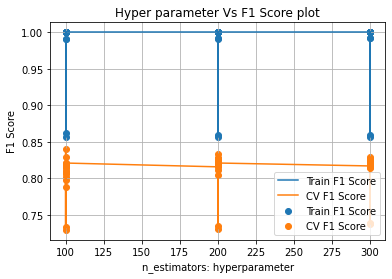

In [73]:
ETC = ExtraTreesClassifier(n_jobs=-1)
parameters = {'n_estimators':[100,200,300], 'criterion': ['gini', 'entropy'], \
              'max_depth': [5, 10, 20, 50, 100, 200, 300, 400, 500]}
clf = GridSearchCV(ETC, parameters, cv=10, scoring='f1_macro', n_jobs=-1, return_train_score=True,verbose=10)
clf.fit(Train, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_n_estimators'])

train_score= results['mean_train_score']
cv_score = results['mean_test_score'] 
alpha =  results['param_n_estimators']

plt.plot(alpha, train_score, label='Train F1 Score')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(alpha, cv_score, label='CV F1 Score')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(alpha, train_score, label='Train F1 Score')
plt.scatter(alpha, cv_score, label='CV F1 Score')

plt.legend()
plt.xlabel("n_estimators: hyperparameter")
plt.ylabel("F1 Score")
plt.title("Hyper parameter Vs F1 Score plot")
plt.grid()
plt.show()

In [74]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 100, 'n_estimators': 100}

Number of misclassified points  17.02970297029703
-------------------------------------------------- Confusion matrix --------------------------------------------------


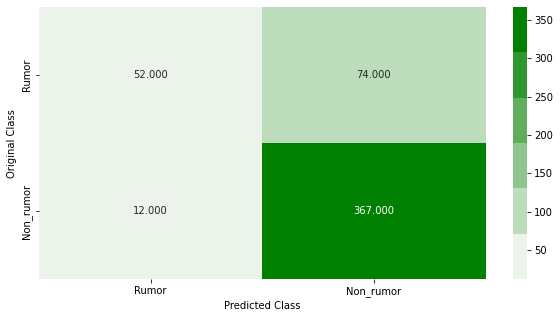

-------------------------------------------------- Precision matrix --------------------------------------------------


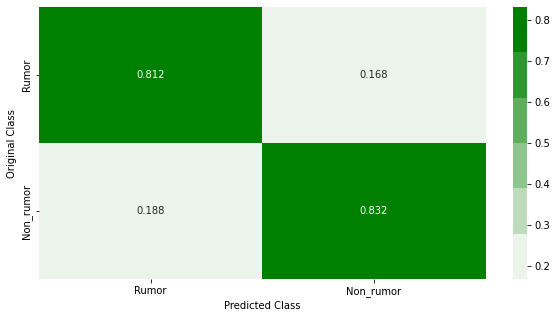

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


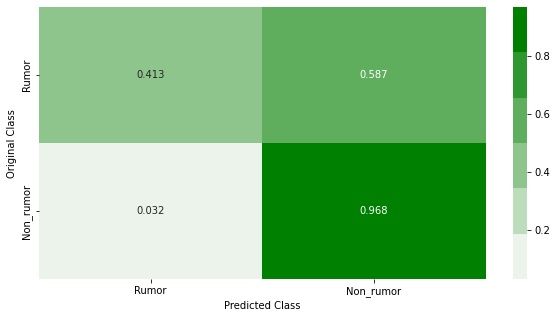

Sum of rows in Recall matrix [1. 1.]


In [45]:
ETC_clf = ExtraTreesClassifier(criterion='gini', max_depth=100, n_estimators=100, n_jobs=-1)
ETC_clf.fit(Train, y_train)
plot_confusion_matrix(y_test, ETC_clf.predict(Test))

Fitting 10 folds for each of 42 candidates, totalling 420 fits


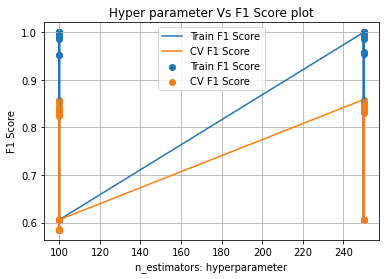

In [76]:
RF = RandomForestClassifier(n_jobs=-1)
parameters={
     'n_estimators': [100, 250],
     'max_depth': [5,8,10, 20, 50, 100, 250],
    'max_samples' : [0.6, 0.75, 1],
}
clf = GridSearchCV(RF, parameters, cv=10, scoring='f1_micro', n_jobs=-1, return_train_score=True,verbose=10)
clf.fit(Train, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_n_estimators'])

train_score= results['mean_train_score']
cv_score = results['mean_test_score'] 
alpha =  results['param_n_estimators']

plt.plot(alpha, train_score, label='Train F1 Score')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(alpha, cv_score, label='CV F1 Score')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(alpha, train_score, label='Train F1 Score')
plt.scatter(alpha, cv_score, label='CV F1 Score')

plt.legend()
plt.xlabel("n_estimators: hyperparameter")
plt.ylabel("F1 Score")
plt.title("Hyper parameter Vs F1 Score plot")
plt.grid()
plt.show()

In [77]:
clf.best_params_

{'max_depth': 250, 'max_samples': 0.75, 'n_estimators': 250}

Number of misclassified points  15.445544554455445
-------------------------------------------------- Confusion matrix --------------------------------------------------


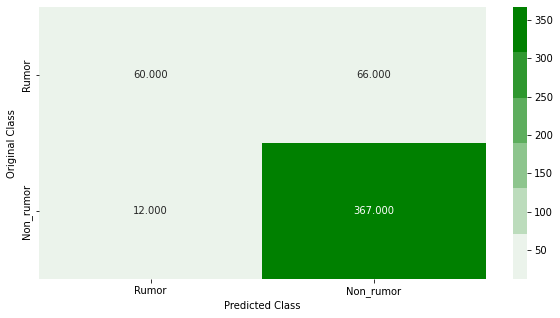

-------------------------------------------------- Precision matrix --------------------------------------------------


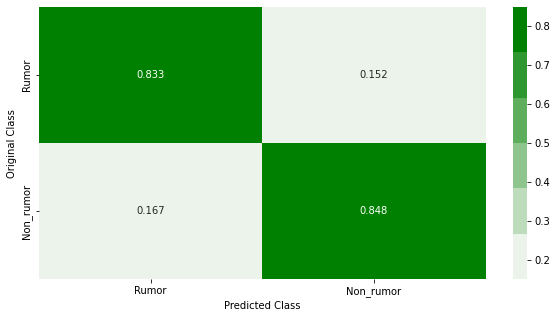

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


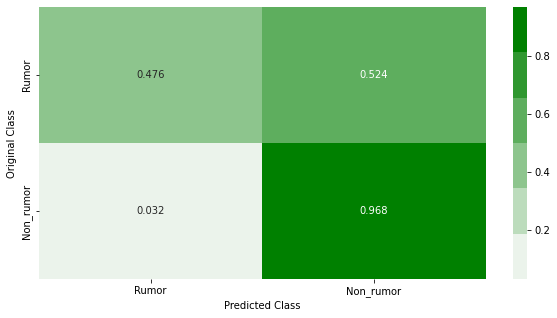

Sum of rows in Recall matrix [1. 1.]


In [46]:
RF_clf = RandomForestClassifier(n_estimators=250, max_depth=250, max_samples=0.75, n_jobs=-1)
RF_clf.fit(Train, y_train)
plot_confusion_matrix(y_test, RF_clf.predict(Test))

Fitting 5 folds for each of 180 candidates, totalling 900 fits


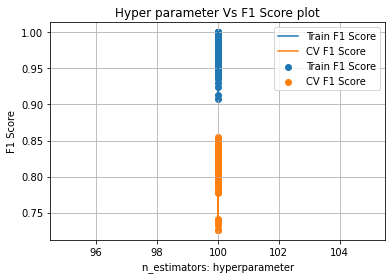

In [80]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
parameters={
    'learning_rate':[0.0001, 0.001, 0.01, 0.1, 1],
     'n_estimators':[100],
     'max_depth':[5, 10, 20,40],
    'colsample_bytree' : [0.6, 0.75, 1],
    'subsample': [0.6, 0.75, 1]
}

clf = GridSearchCV(XGB, parameters, cv=5, scoring='f1_macro', n_jobs=-1, return_train_score=True,verbose=10)
clf.fit(Train, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_n_estimators'])

train_score= results['mean_train_score']
cv_score = results['mean_test_score'] 
alpha =  results['param_n_estimators']

plt.plot(alpha, train_score, label='Train F1 Score')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(alpha, cv_score, label='CV F1 Score')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(alpha, train_score, label='Train F1 Score')
plt.scatter(alpha, cv_score, label='CV F1 Score')

plt.legend()
plt.xlabel("n_estimators: hyperparameter")
plt.ylabel("F1 Score")
plt.title("Hyper parameter Vs F1 Score plot")
plt.grid()
plt.show()

In [81]:
clf.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.1,
 'max_depth': 10,
 'n_estimators': 100,
 'subsample': 0.6}

Number of misclassified points  15.049504950495049
-------------------------------------------------- Confusion matrix --------------------------------------------------


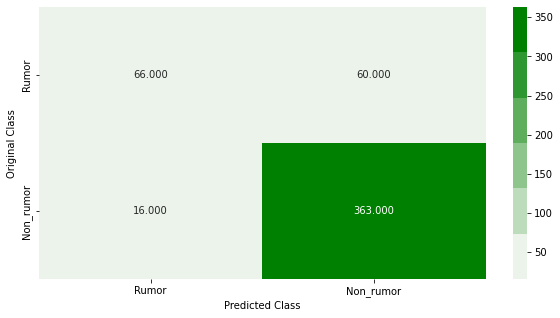

-------------------------------------------------- Precision matrix --------------------------------------------------


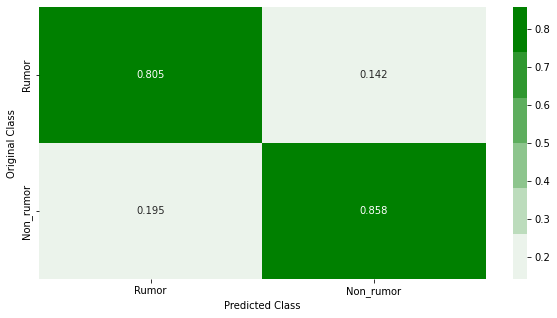

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


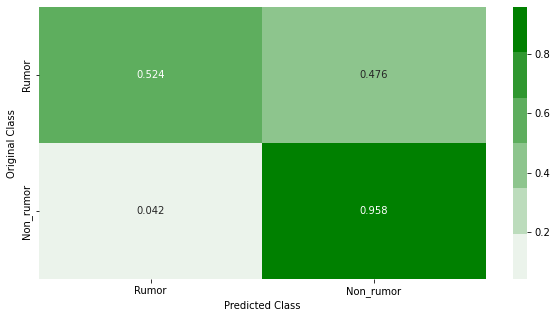

Sum of rows in Recall matrix [1. 1.]


In [47]:
XGB_clf = XGBClassifier(max_depth= 10, learning_rate =0.1, n_estimators=100,subsample= 0.6,colsample_bytree=1, n_jobs=-1)
XGB_clf.fit(Train, y_train)
plot_confusion_matrix(y_test, XGB_clf.predict(Test))

In [40]:
from catboost import CatBoostClassifier
CBC = CatBoostClassifier()
parameters={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1], 'depth': [10, 16], \
            'iterations': [10,20,50,100]}

clf = GridSearchCV(CBC, parameters, cv=5, scoring='f1_macro', n_jobs=-1, error_score='raise',return_train_score=True, verbose=5)
clf.fit(Train, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_depth'])

train_score= results['mean_train_score']
cv_score = results['mean_test_score'] 
alpha =  results['param_depth']

plt.plot(alpha, train_score, label='Train F1 Score')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(alpha, cv_score, label='CV F1 Score')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(alpha, train_score, label='Train F1 Score')
plt.scatter(alpha, cv_score, label='CV F1 Score')

plt.legend()
plt.xlabel("Depth: hyperparameter")
plt.ylabel("F1 Score")
plt.title("Hyper parameter Vs F1 Score plot")
plt.grid()
plt.show()

Fitting 5 folds for each of 40 candidates, totalling 200 fits
0:	learn: 0.6930856	total: 1.38s	remaining: 12.5s
1:	learn: 0.6930079	total: 3.83s	remaining: 15.3s
2:	learn: 0.6929500	total: 6.57s	remaining: 15.3s
3:	learn: 0.6928730	total: 8.99s	remaining: 13.5s
4:	learn: 0.6928001	total: 11.4s	remaining: 11.4s
5:	learn: 0.6927276	total: 14.1s	remaining: 9.42s
6:	learn: 0.6926469	total: 16.7s	remaining: 7.17s
7:	learn: 0.6925693	total: 19.3s	remaining: 4.83s
8:	learn: 0.6924993	total: 21.4s	remaining: 2.38s
9:	learn: 0.6924363	total: 23.6s	remaining: 0us
[CV 5/5] END depth=10, iterations=10, learning_rate=0.0001;, score=(train=0.923, test=0.779) total time=  24.4s
0:	learn: 0.6924891	total: 592ms	remaining: 5.33s
1:	learn: 0.6918114	total: 1.45s	remaining: 5.82s
2:	learn: 0.6911374	total: 2.9s	remaining: 6.77s
3:	learn: 0.6904258	total: 5.51s	remaining: 8.27s
4:	learn: 0.6898026	total: 7.93s	remaining: 7.93s
5:	learn: 0.6890779	total: 10s	remaining: 6.68s
6:	learn: 0.6883075	total: 12.5

48:	learn: 0.6897363	total: 1m 59s	remaining: 2.44s
49:	learn: 0.6896681	total: 2m 1s	remaining: 0us
[CV 2/5] END depth=10, iterations=50, learning_rate=0.0001;, score=(train=0.966, test=0.821) total time= 2.1min
0:	learn: 0.6925335	total: 2.26s	remaining: 1m 50s
1:	learn: 0.6917657	total: 4.06s	remaining: 1m 37s
2:	learn: 0.6911842	total: 6.85s	remaining: 1m 47s
3:	learn: 0.6903939	total: 9.09s	remaining: 1m 44s
4:	learn: 0.6896670	total: 11.7s	remaining: 1m 45s
5:	learn: 0.6889456	total: 14s	remaining: 1m 42s
6:	learn: 0.6881461	total: 16.3s	remaining: 1m 40s
7:	learn: 0.6873784	total: 18.9s	remaining: 1m 39s
8:	learn: 0.6866862	total: 21.1s	remaining: 1m 36s
9:	learn: 0.6860673	total: 23.6s	remaining: 1m 34s
10:	learn: 0.6853080	total: 26s	remaining: 1m 32s
11:	learn: 0.6846047	total: 28.2s	remaining: 1m 29s
12:	learn: 0.6839022	total: 30.9s	remaining: 1m 28s
13:	learn: 0.6832938	total: 33.4s	remaining: 1m 25s
14:	learn: 0.6826274	total: 35.9s	remaining: 1m 23s
15:	learn: 0.6819617	

0:	learn: 0.6930813	total: 1.39s	remaining: 12.5s
1:	learn: 0.6930125	total: 3.82s	remaining: 15.3s
2:	learn: 0.6929451	total: 6.53s	remaining: 15.2s
3:	learn: 0.6928739	total: 9.16s	remaining: 13.7s
4:	learn: 0.6928110	total: 11.6s	remaining: 11.6s
5:	learn: 0.6927382	total: 13.8s	remaining: 9.2s
6:	learn: 0.6926606	total: 16.3s	remaining: 6.99s
7:	learn: 0.6925928	total: 18.9s	remaining: 4.72s
8:	learn: 0.6925208	total: 21.3s	remaining: 2.36s
9:	learn: 0.6924458	total: 23.6s	remaining: 0us
[CV 4/5] END depth=10, iterations=10, learning_rate=0.0001;, score=(train=0.953, test=0.777) total time=  25.0s
0:	learn: 0.6925335	total: 752ms	remaining: 6.76s
1:	learn: 0.6917657	total: 2.13s	remaining: 8.53s
2:	learn: 0.6911842	total: 3.81s	remaining: 8.88s
3:	learn: 0.6903939	total: 5.99s	remaining: 8.99s
4:	learn: 0.6896670	total: 8.13s	remaining: 8.13s
5:	learn: 0.6889456	total: 10.2s	remaining: 6.83s
6:	learn: 0.6881461	total: 12.7s	remaining: 5.44s
7:	learn: 0.6873784	total: 15s	remaining:

0:	learn: 0.6924653	total: 2s	remaining: 18s
1:	learn: 0.6915908	total: 4.62s	remaining: 18.5s
2:	learn: 0.6909748	total: 7.3s	remaining: 17s
3:	learn: 0.6902439	total: 9.86s	remaining: 14.8s
4:	learn: 0.6895139	total: 12.3s	remaining: 12.3s
5:	learn: 0.6887032	total: 15s	remaining: 10s
6:	learn: 0.6878919	total: 17.4s	remaining: 7.48s
7:	learn: 0.6871381	total: 19.7s	remaining: 4.93s
8:	learn: 0.6865482	total: 22.2s	remaining: 2.46s
9:	learn: 0.6858200	total: 23.9s	remaining: 0us
[CV 3/5] END depth=10, iterations=10, learning_rate=0.001;, score=(train=0.944, test=0.749) total time=  25.2s
0:	learn: 0.6863724	total: 1.66s	remaining: 15s
1:	learn: 0.6777871	total: 3.79s	remaining: 15.1s
2:	learn: 0.6723707	total: 6.13s	remaining: 14.3s
3:	learn: 0.6653726	total: 8.6s	remaining: 12.9s
4:	learn: 0.6585005	total: 11s	remaining: 11s
5:	learn: 0.6509707	total: 13.7s	remaining: 9.14s
6:	learn: 0.6434808	total: 15.8s	remaining: 6.77s
7:	learn: 0.6371703	total: 18.2s	remaining: 4.56s
8:	learn: 

0:	learn: 0.6925068	total: 2.66s	remaining: 23.9s
1:	learn: 0.6917955	total: 5.28s	remaining: 21.1s
2:	learn: 0.6911720	total: 7.91s	remaining: 18.4s
3:	learn: 0.6903560	total: 10.2s	remaining: 15.3s
4:	learn: 0.6896945	total: 12.9s	remaining: 12.9s
5:	learn: 0.6889929	total: 15.4s	remaining: 10.3s
6:	learn: 0.6882523	total: 17.8s	remaining: 7.63s
7:	learn: 0.6875651	total: 20.5s	remaining: 5.12s
8:	learn: 0.6869744	total: 22.5s	remaining: 2.5s
9:	learn: 0.6862805	total: 23.4s	remaining: 0us
[CV 2/5] END depth=10, iterations=10, learning_rate=0.001;, score=(train=0.944, test=0.792) total time=  25.1s
0:	learn: 0.6870434	total: 2.48s	remaining: 22.3s
1:	learn: 0.6795030	total: 4.72s	remaining: 18.9s
2:	learn: 0.6731913	total: 6.82s	remaining: 15.9s
3:	learn: 0.6656196	total: 9.37s	remaining: 14.1s
4:	learn: 0.6589941	total: 12.1s	remaining: 12.1s
5:	learn: 0.6519634	total: 14.2s	remaining: 9.44s
6:	learn: 0.6451142	total: 16.5s	remaining: 7.08s
7:	learn: 0.6385025	total: 19.1s	remaining

0:	learn: 0.6930785	total: 2.85s	remaining: 25.7s
1:	learn: 0.6929905	total: 5.18s	remaining: 20.7s
2:	learn: 0.6929291	total: 7.78s	remaining: 18.1s
3:	learn: 0.6928554	total: 10.2s	remaining: 15.3s
4:	learn: 0.6927821	total: 12.8s	remaining: 12.8s
5:	learn: 0.6927006	total: 15.3s	remaining: 10.2s
6:	learn: 0.6926189	total: 17.8s	remaining: 7.62s
7:	learn: 0.6925425	total: 20.2s	remaining: 5.06s
8:	learn: 0.6924828	total: 22.4s	remaining: 2.49s
9:	learn: 0.6924171	total: 23.3s	remaining: 0us
[CV 3/5] END depth=10, iterations=10, learning_rate=0.0001;, score=(train=0.946, test=0.731) total time=  24.7s
0:	learn: 0.6311019	total: 2.41s	remaining: 21.7s
1:	learn: 0.5706026	total: 4.78s	remaining: 19.1s
2:	learn: 0.5216751	total: 7.08s	remaining: 16.5s
3:	learn: 0.4781160	total: 9.61s	remaining: 14.4s
4:	learn: 0.4413443	total: 12.2s	remaining: 12.2s
5:	learn: 0.4066912	total: 14.6s	remaining: 9.71s
6:	learn: 0.3786781	total: 16.9s	remaining: 7.24s
7:	learn: 0.3503702	total: 19.4s	remaini

KeyboardInterrupt: 

In [86]:
clf.best_params_

{'depth': 10, 'iterations': 100, 'learning_rate': 0.1}

0:	learn: 0.6226715	total: 147ms	remaining: 14.6s
1:	learn: 0.5592419	total: 239ms	remaining: 11.7s
2:	learn: 0.5059509	total: 407ms	remaining: 13.1s
3:	learn: 0.4592244	total: 635ms	remaining: 15.3s
4:	learn: 0.4198395	total: 796ms	remaining: 15.1s
5:	learn: 0.3900323	total: 1s	remaining: 15.7s
6:	learn: 0.3609539	total: 1.17s	remaining: 15.6s
7:	learn: 0.3369892	total: 1.35s	remaining: 15.5s
8:	learn: 0.3161512	total: 1.56s	remaining: 15.8s
9:	learn: 0.2979270	total: 1.71s	remaining: 15.4s
10:	learn: 0.2823111	total: 1.93s	remaining: 15.6s
11:	learn: 0.2660094	total: 2.1s	remaining: 15.4s
12:	learn: 0.2521095	total: 2.26s	remaining: 15.1s
13:	learn: 0.2420878	total: 2.41s	remaining: 14.8s
14:	learn: 0.2314877	total: 2.57s	remaining: 14.6s
15:	learn: 0.2206613	total: 2.75s	remaining: 14.4s
16:	learn: 0.2122791	total: 2.95s	remaining: 14.4s
17:	learn: 0.2018191	total: 3.14s	remaining: 14.3s
18:	learn: 0.1924201	total: 3.32s	remaining: 14.2s
19:	learn: 0.1864863	total: 3.5s	remaining: 1

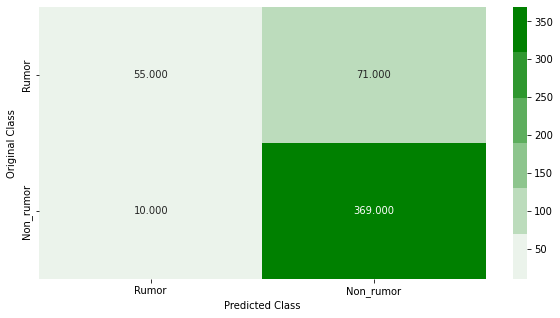

-------------------------------------------------- Precision matrix --------------------------------------------------


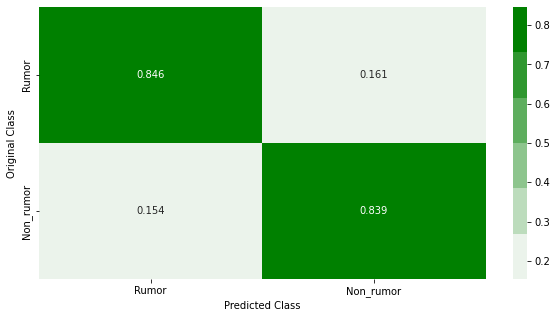

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


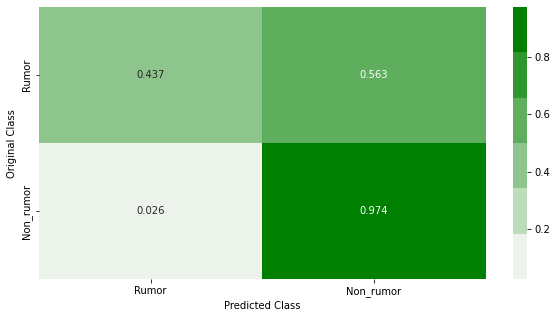

Sum of rows in Recall matrix [1. 1.]


In [48]:
from catboost import CatBoostClassifier
CBC_clf = CatBoostClassifier(depth= 10, learning_rate =0.1, iterations=100)
CBC_clf.fit(Train, y_train)
plot_confusion_matrix(y_test, CBC_clf.predict(Test))

In [49]:
from prettytable import PrettyTable
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
myTable = PrettyTable(["Model","Train / Test", "Accuray", "F1-Score", "Precison", "Recall"])
  
# Add rows
myTable.add_row(["KNN", "Train", np.round(accuracy_score(y_train, KNN_clf.predict(Train)), 6), np.round(f1_score(y_train, KNN_clf.predict(Train),\
                average='macro'), 6), np.round(precision_score(y_train, KNN_clf.predict(Train), average='macro'), 6), \
                 np.round(recall_score(y_train, KNN_clf.predict(Train), average='macro'), 6)])

myTable.add_row(["KNN", "Test", np.round(accuracy_score(y_test, KNN_clf.predict(Test)), 6), np.round(f1_score(y_test, KNN_clf.predict(Test),\
                average='macro'), 6), np.round(precision_score(y_test, KNN_clf.predict(Test), average='macro'), 6), \
                 np.round(recall_score(y_test, KNN_clf.predict(Test), average='macro'), 6)])

myTable.add_row(["SVC-Linear", "Train", np.round(accuracy_score(y_train, svm_clf.predict(Train)), 6), np.round(f1_score(y_train, svm_clf.predict(Train),\
                average='macro'), 6), np.round(precision_score(y_train, svm_clf.predict(Train), average='macro'), 6), \
                 np.round(recall_score(y_train, svm_clf.predict(Train), average='macro'), 6)])

myTable.add_row(["SVC-Linear", "Test", np.round(accuracy_score(y_test, svm_clf.predict(Test)), 6), np.round(f1_score(y_test, svm_clf.predict(Test),\
                average='macro'), 6), np.round(precision_score(y_test, svm_clf.predict(Test), average='macro'), 6), \
                 np.round(recall_score(y_test, svm_clf.predict(Test), average='macro'), 6)])

myTable.add_row(["SVC-RBF", "Train", np.round(accuracy_score(y_train, svm_clf_rbf.predict(Train)), 6), np.round(f1_score(y_train, svm_clf_rbf.predict(Train),\
                average='macro'), 6), np.round(precision_score(y_train, svm_clf_rbf.predict(Train), average='macro'), 6), \
                 np.round(recall_score(y_train, svm_clf_rbf.predict(Train), average='macro'), 6)])

myTable.add_row(["SVC-RBF", "Test", np.round(accuracy_score(y_test, svm_clf_rbf.predict(Test)), 6), np.round(f1_score(y_test, svm_clf_rbf.predict(Test),\
                average='macro'), 6), np.round(precision_score(y_test, svm_clf_rbf.predict(Test), average='macro'), 6), \
                 np.round(recall_score(y_test, svm_clf_rbf.predict(Test), average='macro'), 6)])

myTable.add_row(["SVC-Poly", "Train", np.round(accuracy_score(y_train, svm_clf_poly.predict(Train)), 6), np.round(f1_score(y_train, svm_clf_poly.predict(Train),\
                average='macro'), 6), np.round(precision_score(y_train, svm_clf_poly.predict(Train), average='macro'), 6), \
                 np.round(recall_score(y_train, svm_clf_poly.predict(Train), average='macro'), 6)])

myTable.add_row(["SVC-Poly", "Test", np.round(accuracy_score(y_test, svm_clf_poly.predict(Test)), 6), np.round(f1_score(y_test, svm_clf_poly.predict(Test),\
                average='macro'), 6), np.round(precision_score(y_test, svm_clf_poly.predict(Test), average='macro'), 6), \
                 np.round(recall_score(y_test, svm_clf_poly.predict(Test), average='macro'), 6)])

myTable.add_row(["BernoulliNB", "Train", np.round(accuracy_score(y_train, BNB_clf.predict(Train)), 6), np.round(f1_score(y_train, BNB_clf.predict(Train),\
                average='macro'), 6), np.round(precision_score(y_train, BNB_clf.predict(Train), average='macro'), 6), \
                 np.round(recall_score(y_test, BNB_clf.predict(Test), average='macro'), 6)])
myTable.add_row(["BernoulliNB", "Test", np.round(accuracy_score(y_test, BNB_clf.predict(Test)), 6), np.round(f1_score(y_test, BNB_clf.predict(Test),\
                average='macro'), 6), np.round(precision_score(y_test, BNB_clf.predict(Test), average='macro'), 6), \
                 np.round(recall_score(y_test, BNB_clf.predict(Test), average='macro'), 6)])
myTable.add_row(["Logistic Regression","Train", np.round(accuracy_score(y_train, LR_clf.predict(Train)), 6), np.round(f1_score(y_train, LR_clf.predict(Train),\
                average='macro'), 6), np.round(precision_score(y_train, LR_clf.predict(Train), average='macro'), 6),\
                 np.round(recall_score(y_train, LR_clf.predict(Train), average='macro'), 6)])

myTable.add_row(["Logistic Regression","Test", np.round(accuracy_score(y_test, LR_clf.predict(Test)), 6), np.round(f1_score(y_test, LR_clf.predict(Test),\
                average='macro'), 6), np.round(precision_score(y_test, LR_clf.predict(Test), average='macro'), 6),\
                 np.round(recall_score(y_test, LR_clf.predict(Test), average='macro'), 6)])

myTable.add_row(["Decision Tree","Train", np.round(accuracy_score(y_train, DTC_clf.predict(Train)), 6), np.round(f1_score(y_train, DTC_clf.predict(Train),\
                average='macro'), 6), np.round(precision_score(y_train, DTC_clf.predict(Train), average='macro'), 6),\
                 np.round(recall_score(y_train, DTC_clf.predict(Train), average='macro'), 6)])

myTable.add_row(["Decision Tree","Test", np.round(accuracy_score(y_test, DTC_clf.predict(Test)), 6), np.round(f1_score(y_test, DTC_clf.predict(Test),\
                average='macro'), 6), np.round(precision_score(y_test, DTC_clf.predict(Test), average='macro'), 6),\
                 np.round(recall_score(y_test, DTC_clf.predict(Test), average='macro'), 6)])

myTable.add_row(["Extra Tree","Train", np.round(accuracy_score(y_train, ETC_clf.predict(Train)), 6), np.round(f1_score(y_train, ETC_clf.predict(Train),\
                average='macro'), 6), np.round(precision_score(y_train, ETC_clf.predict(Train), average='macro'), 6),\
                 np.round(recall_score(y_train, ETC_clf.predict(Train), average='macro'), 6)])

myTable.add_row(["Extra Tree","Test", np.round(accuracy_score(y_test, ETC_clf.predict(Test)), 6), np.round(f1_score(y_test, ETC_clf.predict(Test),\
                average='macro'), 6), np.round(precision_score(y_test, ETC_clf.predict(Test), average='macro'), 6),\
                 np.round(recall_score(y_test, ETC_clf.predict(Test), average='macro'), 6)])

myTable.add_row(["Random Forest","Train", np.round(accuracy_score(y_train, RF_clf.predict(Train)), 6), np.round(f1_score(y_train, RF_clf.predict(Train),\
                average='macro'), 6), np.round(precision_score(y_train, RF_clf.predict(Train), average='macro'), 6),\
                 np.round(recall_score(y_train, RF_clf.predict(Train), average='macro'), 6)])

myTable.add_row(["Random Forest","Test", np.round(accuracy_score(y_test, RF_clf.predict(Test)), 6), np.round(f1_score(y_test, RF_clf.predict(Test),\
                average='macro'), 6), np.round(precision_score(y_test, RF_clf.predict(Test), average='macro'), 6),\
                 np.round(recall_score(y_test, RF_clf.predict(Test), average='macro'), 6)])

myTable.add_row(["XGBOOST","Train", np.round(accuracy_score(y_train, XGB_clf.predict(Train)), 6), np.round(f1_score(y_train, XGB_clf.predict(Train),\
                average='macro'), 6), np.round(precision_score(y_train, XGB_clf.predict(Train), average='macro'), 6),\
                 np.round(recall_score(y_train, XGB_clf.predict(Train), average='macro'), 6)])

myTable.add_row(["XGBOOST","Test", np.round(accuracy_score(y_test, XGB_clf.predict(Test)), 6), np.round(f1_score(y_test, XGB_clf.predict(Test),\
                average='macro'), 6), np.round(precision_score(y_test, XGB_clf.predict(Test), average='macro'), 6),\
                 np.round(recall_score(y_test, XGB_clf.predict(Test), average='macro'), 6)])

myTable.add_row(["CatBoost","Train", np.round(accuracy_score(y_train, CBC_clf.predict(Train)), 6), np.round(f1_score(y_train, CBC_clf.predict(Train),\
                average='macro'), 6), np.round(precision_score(y_train, CBC_clf.predict(Train), average='macro'), 6),\
                 np.round(recall_score(y_train, CBC_clf.predict(Train), average='macro'), 6)])

myTable.add_row(["CatBoost","Test", np.round(accuracy_score(y_test, CBC_clf.predict(Test)), 6), np.round(f1_score(y_test, CBC_clf.predict(Test),\
                average='macro'), 6), np.round(precision_score(y_test, CBC_clf.predict(Test), average='macro'), 6),\
                 np.round(recall_score(y_test, CBC_clf.predict(Test), average='macro'), 6)])


print(myTable)

+---------------------+--------------+----------+----------+----------+----------+
|        Model        | Train / Test | Accuray  | F1-Score | Precison |  Recall  |
+---------------------+--------------+----------+----------+----------+----------+
|         KNN         |    Train     | 0.852891 | 0.751582 | 0.894106 | 0.711794 |
|         KNN         |     Test     | 0.780198 | 0.589908 | 0.749696 | 0.586014 |
|      SVC-Linear     |    Train     | 0.883503 | 0.82677  | 0.877173 | 0.797519 |
|      SVC-Linear     |     Test     | 0.879208 | 0.818539 | 0.876973 | 0.787075 |
|       SVC-RBF       |    Train     | 0.876701 | 0.811106 | 0.879972 | 0.77694  |
|       SVC-RBF       |     Test     | 0.879208 | 0.813331 | 0.892316 | 0.776479 |
|       SVC-Poly      |    Train     | 0.937925 | 0.911454 | 0.944023 | 0.887614 |
|       SVC-Poly      |     Test     | 0.893069 | 0.846092 | 0.880617 |  0.8228  |
|     BernoulliNB     |    Train     | 0.794218 | 0.689011 | 0.726947 | 0.682665 |
|   

## Custom Stacking Classifier:

##### a. Splitting the train data into 2 parts

In [89]:
classifiers_dict = {
               "XGB": XGB_clf,
               "SVC_Linear": SVC(C=100, gamma="auto", kernel = "linear", probability=True, random_state=42),
               "SVC_Poly":SVC(C = 75, degree = 2, gamma = "auto", probability=True, kernel = "poly", random_state=42),
               "SVC_RBF":SVC(C = 100, degree = 1, gamma = "auto", probability=True, kernel = "rbf", random_state=42),
               "CatBoost": CBC_clf,
               "Random_Forest": RF_clf,
               "Logistic_Regression": LR_clf,
               "Extra_Tree":ETC_clf,
               "Decision_Tree":DTC_clf,
               "KNN":KNN_clf,
    "BNB":BNB_clf
               }

base_models_list = list(classifiers_dict.values())

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot

In [ ]:
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('SVC_Linear', SVC(C=1.5, gamma="auto", kernel = "linear", probability=True, random_state=42)))
    level0.append(('SVC_Poly', SVC(C = 75, degree = 2, gamma = "auto", probability=True, kernel = "poly", random_state=42)))
    level0.append(('SVC_RBF', SVC(C = 100, degree = 1, gamma = "auto", probability=True, kernel = "rbf", random_state=42)))
    level0.append(('KNN', KNN_clf))
    level0.append(('BNB', BNB_clf))
    level0.append(('bayes', GaussianNB()))
    level0.append(('Random_Forest', RF_clf))
    level0.append(('Extra_Tree', ETC_clf))
    level0.append(('Decision_Tree', DTC_clf))
    level0.append(('XGB',XGB_clf))
    level0.append(('catboost', CBC_clf))
    

    level1 = LR_clf
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model
 

def get_models():
    return classifiers_dict
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 

models = get_models()

results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, Train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [90]:
# splitting the Actuall Train Dataset into 50:50

Train_D1, Train_D2, y_train_D1, y_train_D2 = train_test_split(Train, y_train, test_size=0.5, stratify=y_train, random_state=42)

print('{} is the shape of Train Data D1 and {} is the shape of Train data D2.'.format(Train_D1.shape, Train_D2.shape))

(310, 200) is the shape of Train Data D1 and (310, 200) is the shape of Train data D2.


In [91]:
from sklearn.utils import resample
def stacking_classifier(k_model, base_models, meta_model, D1, D2, y_D1, y_D2, test, y_te):
  """This function performs custom stacking classification as it takes no. of base models, then the output of the base models will the added to the another dataset and that dataset used to train the meta classifier""" 
  base_model_fits = []
  predictions = pd.DataFrame()
  predictions_test = pd.DataFrame()
  for i in range(k_model):
      base_model = base_models[i]

      # Get a random sample with replacement with a size of 1000 from D1 
      train_sample, y_sample = resample(D1, y_D1, n_samples=1000, stratify=y_D1, random_state=42)

      base_model.fit(train_sample, y_sample) # train the model on sample
      base_model_fits.append(base_model) # save the base model

  for j in range(k_model): # send D2 to all base models
      y_pred = base_model_fits[j].predict_proba(D2) #predict  the probablities of the classes for D2 set
      for c in range(len(y_pred[0])):
          predictions[f"{j}{c}"] = y_pred[0:,c] # store the probablities of each class 

  for m in range(k_model): # send test data to all base models
      y_pred_test = base_model_fits[m].predict_proba(test) #predict  the probablities of the classes for test set
      for p in range(len(y_pred_test[0])):
          predictions_test[f"{m}{p}"] = y_pred_test[0:,p]  # store the probablities of each class
        
  meta_data_train = ((D2, predictions)) # stacking the D2 data and prediction probablities from k base model for meta classifier
  meta_data_test = ((test, predictions_test)) # stacking the train data and k prediction for test set

  
  meta_model.fit(meta_data_train, y_D2) # train the meta model on meta data
  print("F1-Score for {} as Meta classifier and {} number of base model is {}".format('Logistic_Regression', K+1, np.round(f1_score(y_te, meta_model.predict(meta_data_test), average='macro'), 6)))
  #plot_confusion_matrix(y_te, meta_model.predict(meta_data_test))

        
        
for K in range(len(base_models_list)):
  stacking_classifier(K+1, base_models_list, classifiers_dict['Logistic_Regression'], Train_D1, Train_D2, y_train_D1, y_train_D2, Test, y_test)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (2, 310) + inhomogeneous part.